In [2]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

data = pd.read_csv("SeoulBikeData (1).csv",encoding='CP949')

In [3]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
data[train_size+val_size:]

NameError: name 'train_size' is not defined

In [ ]:
sum(data['Rented Bike Count']==0)

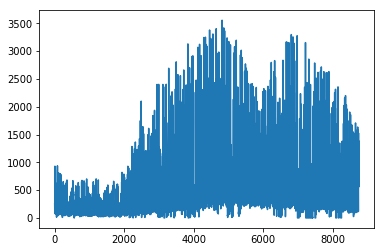

In [5]:
plt.plot(data['Rented Bike Count'])

In [6]:
data['Holiday']=data['Holiday'].factorize()[0]

In [7]:
data['Seasons']=data['Seasons'].factorize()[0]
data['Functioning Day']=data['Functioning Day'].factorize()[0]

In [8]:
data['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [9]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,0


In [10]:
data=data.drop(['Hour'],axis=1)

In [11]:
data.columns[1:-3]

Index(['Rented Bike Count', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [12]:
cols=data.columns[1:-3] 
len(cols)

9

In [13]:
from sklearn.preprocessing import MinMaxScaler
values = data[cols].values.reshape(-1,9)
values = values.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled=scaler.fit_transform(values)
#scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [14]:
 
# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 7 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if values[row,0]==0:
                values[row,0] = values[row - one_day,0]

In [15]:
fill_missing(values)

In [16]:
sum(pd.DataFrame(values)[0]==0)

0

In [17]:
scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [18]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train,val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

7008 876 876


In [19]:
data[0:train_size]

,Date,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,0
1,01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,0
2,01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,0
3,01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,0
4,01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,18/09/2018,0,23.2,57,2.2,2000,14.2,0.03,0.0,0.0,3,0,1
7004,18/09/2018,0,22.6,58,1.4,2000,13.9,0.00,0.0,0.0,3,0,1
7005,18/09/2018,0,22.1,61,1.5,2000,14.2,0.00,0.0,0.0,3,0,1
7006,18/09/2018,0,21.8,65,0.3,2000,14.9,0.00,0.0,0.0,3,0,1


In [20]:
data[train_size:train_size+val_size]

,Date,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7008,19/09/2018,0,21.0,66,0.4,2000,14.3,0.00,0.0,0.0,3,0,1
7009,19/09/2018,0,20.5,64,0.4,2000,13.4,0.00,0.0,0.0,3,0,1
7010,19/09/2018,0,20.0,70,0.2,2000,14.3,0.00,0.0,0.0,3,0,1
7011,19/09/2018,0,19.7,70,0.5,2000,14.0,0.00,0.0,0.0,3,0,1
7012,19/09/2018,0,19.5,70,0.5,2000,13.8,0.00,0.0,0.0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7879,25/10/2018,1251,7.3,85,1.4,1039,4.9,0.00,0.0,0.0,3,0,0
7880,25/10/2018,2070,7.9,76,1.2,1290,3.9,0.25,0.0,0.0,3,0,0
7881,25/10/2018,1168,10.3,64,1.0,1544,3.7,0.91,0.0,0.0,3,0,0
7882,25/10/2018,779,13.4,53,1.1,1768,4.0,1.53,0.0,0.0,3,0,0


In [21]:
data[val_size:]

,Date,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
876,06/01/2018,283,0.0,35,2.3,1672,-13.6,1.07,0.0,0.0,0,0,0
877,06/01/2018,356,0.9,28,2.4,1895,-15.6,1.18,0.0,0.0,0,0,0
878,06/01/2018,370,1.8,29,2.0,1693,-14.3,1.14,0.0,0.0,0,0,0
879,06/01/2018,373,2.3,27,2.2,1877,-14.8,0.92,0.0,0.0,0,0,0
880,06/01/2018,352,2.7,27,2.2,1811,-14.4,0.64,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,3,0,0
8756,30/11/2018,764,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,3,0,0
8757,30/11/2018,694,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,3,0,0
8758,30/11/2018,712,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,3,0,0


In [22]:
def create_dataset_multistep(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i+ look_back-1: i+ look_back+predict-1, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [23]:
look_back = 168
predict=24

trainX, trainY = create_dataset_multistep(train, look_back,predict)
valX, valY = create_dataset_multistep(val, look_back,predict)
testX, testY = create_dataset_multistep(test, look_back,predict)


6816
684
684


In [24]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))

In [25]:
trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],testY.shape[1],1))

In [93]:
print(trainX.shape)
print(trainY.shape)

(6816, 1, 168, 9)
(6816, 24, 1)


In [80]:
class CharacterTable(object):
    def __init__(self, chars):
        """Initialize character table.
        # Arguments
            chars: Characters that can appear in the input.
        """
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))

    def encode(self, C, num_rows):
        """One hot encode given string C.
        # Arguments
            num_rows: Number of rows in the returned one hot encoding. This is
                used to keep the # of rows for each data the same.
        """
        x = np.zeros((num_rows, len(self.chars)))
        for i, c in enumerate(C):
            x[i, self.char_indices[c]] = 1
        return x

    def decode(self, x, calc_argmax=True):
        if calc_argmax:
            x = x.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in x)

### CNN-LSTM

In [103]:
first_input = Input(shape=(168,9))

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

#in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in0= BatchNormalization(scale=False)(in0)
in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
#in1=Flatten()(in1)
#in1=Dense(100, activation='relu')(in1)
in1=LSTM(100, return_sequences=False)(in1)
#in1=RepeatVector(24)(in1)
#in1=LSTM(50, return_sequences=True)(in1)
#in1=Dropout(0.3)(in1)
in1=Dense(100)(in1)
#in1=RepeatVector(24)(in1)

in1=Dropout(0.3)(in1)
out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/bike_1dcnnlstm_multi_exp2.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# fit model9
#history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

In [104]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 168, 9)]          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 168, 64)           2944      
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 168, 64)           12352     
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 168, 64)           4160      
_________________________________________________________________
extractor (MaxPooling1D)     (None, 84, 64)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               1010

In [111]:
history=model.fit(trainX, trainY, epochs=30, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 6816 samples, validate on 684 samples
Epoch 1/30
6800/6816 [============================>.] - ETA: 0s - loss: 0.0296
Epoch 00001: val_loss improved from inf to 0.02807, saving model to saved_weights/bike_1dcnnlstm_multi_exp2.hdf5
6816/6816 [==============================] - 5s 781us/sample - loss: 0.0296 - val_loss: 0.0281
Epoch 2/30
6800/6816 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00002: val_loss improved from 0.02807 to 0.02050, saving model to saved_weights/bike_1dcnnlstm_multi_exp2.hdf5
6816/6816 [==============================] - 4s 587us/sample - loss: 0.0188 - val_loss: 0.0205
Epoch 3/30
6800/6816 [============================>.] - ETA: 0s - loss: 0.0159
Epoch 00003: val_loss improved from 0.02050 to 0.01795, saving model to saved_weights/bike_1dcnnlstm_multi_exp2.hdf5
6816/6816 [==============================] - 4s 587us/sample - loss: 0.0159 - val_loss: 0.0180
Epoch 4/30
6800/6816 [============================>.] - ETA: 0s - loss: 0.0136
Epoch

In [96]:
trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],testY.shape[1],1))

In [112]:
model.load_weights("saved_weights/bike_1dcnnlstm_multi_exp2.hdf5")

In [113]:
j=[14, 9, 19, 10, 12, 25, 23, 3, 26, 18, 24, 15, 22, 8, 27]

In [69]:
from math import *
from sklearn.metrics import *

In [115]:
aug_rm=[]
aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.05868
Test RMSE: 0.07393
Test MAE: 0.03729
Test RMSE: 0.04625
Test MAE: 0.04766
Test RMSE: 0.06859
Test MAE: 0.06709
Test RMSE: 0.09940
Test MAE: 0.05345
Test RMSE: 0.08118
Test MAE: 0.03968
Test RMSE: 0.06657
Test MAE: 0.03064
Test RMSE: 0.04237
Test MAE: 0.06427
Test RMSE: 0.09910
Test MAE: 0.04965
Test RMSE: 0.07253
Test MAE: 0.05152
Test RMSE: 0.07643
Test MAE: 0.04234
Test RMSE: 0.07381
Test MAE: 0.07281
Test RMSE: 0.08954
Test MAE: 0.06582
Test RMSE: 0.07971
Test MAE: 0.08538
Test RMSE: 0.10088
Test MAE: 0.07000
Test RMSE: 0.09572
0.07773450862959194
0.05575136


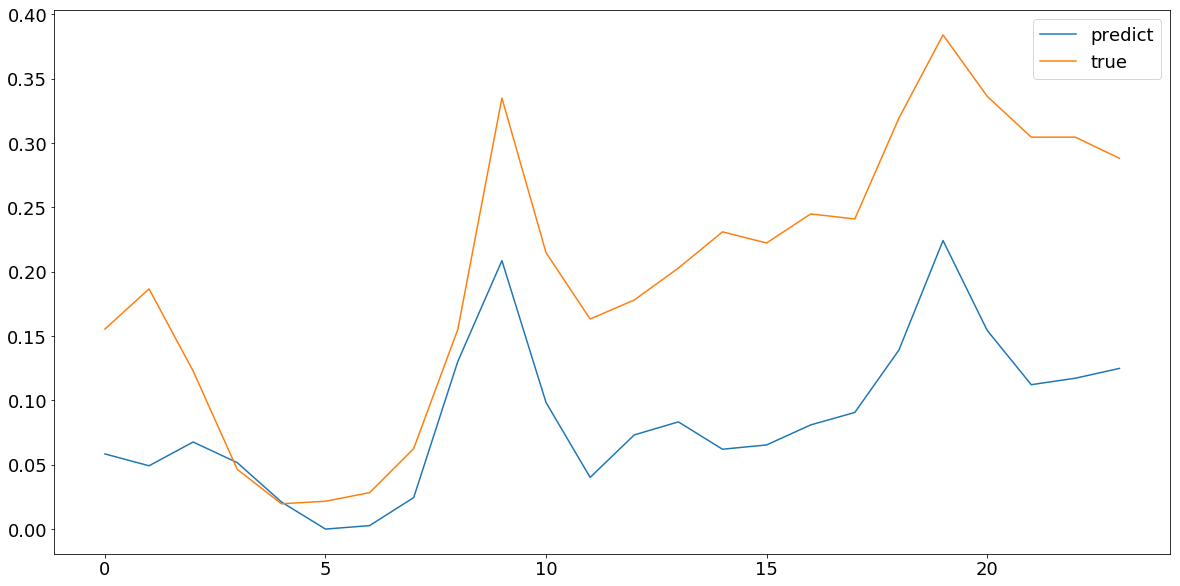

Test RMSE: 0.12865
Test MAE: 0.11260
Test MSE: 0.01655
Test RMSE: 461.39972
Test MAE: 403.83798


In [259]:
#1dcnn-lstm

from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*5+12]
testy=testY[24*5+12]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


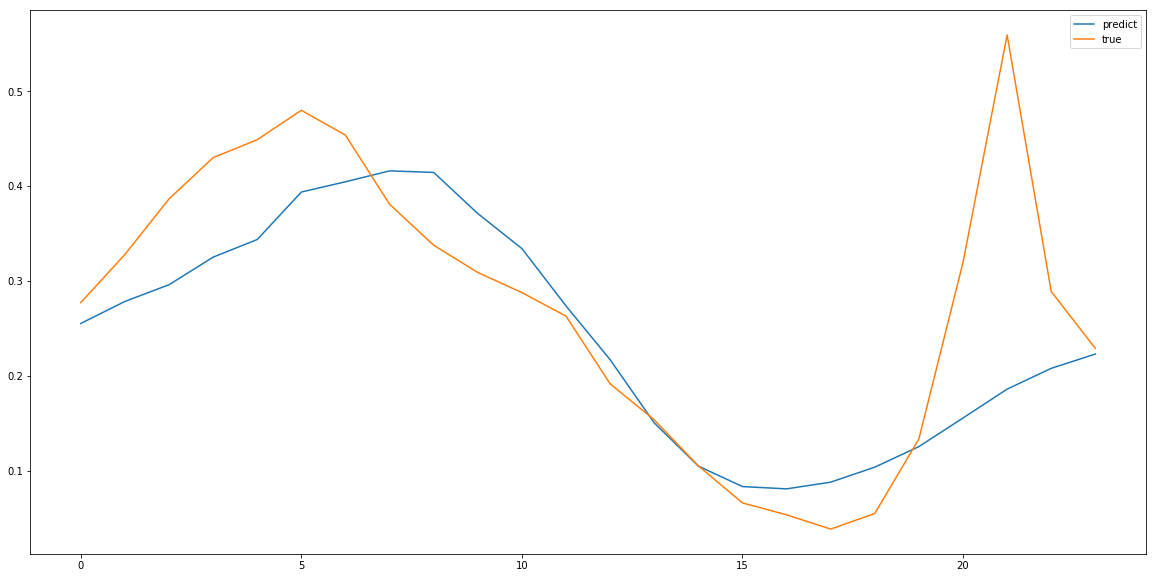

Test RMSE: 0.09910
Test MAE: 0.06427
Test MSE: 0.00982
Test RMSE: 355.43524
Test MAE: 230.49544


In [117]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*3]
testy=testY[24*3]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


In [26]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

In [303]:
thu

[4, 11, 18, 25]

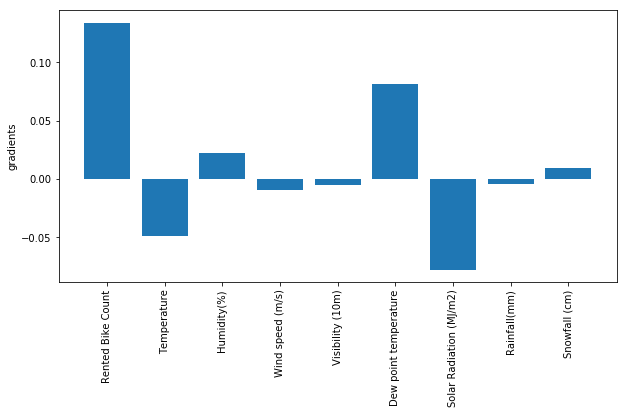

In [316]:
columns=cols
X_test=testX.copy()
id_=24*18+12
grad_imp = gradient_importance(X_test[id_], model)

SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [341]:
id_=24*19+12

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([ 612.,  517.,  327.,  210.,  164.,  135.,  362., 1047., 1916.,
       1019.,  779.,  892.,  963., 1028., 1001., 1063., 1137., 1532.,
       2200., 1464., 1269., 1239., 1074.,  757.,  610.,  489.,  313.,
        219.,  154.,  172.,  357.,  883., 1686., 1300.,  782.,  770.,
        942.,  883.,  899.,  971., 1123., 1416., 2034., 1448., 1146.,
       1123., 1061.,  721.,  683.,  520.,  376.,  262.,  171.,  151.,
        412.,  939., 1692.,  991.,  699.,  834.,  886.,  920.,  915.,
        995., 1126., 1346., 1956., 1303.,  995.,  907.,  894.,  687.,
        626.,  597.,  456.,  288.,  195.,  129.,  151.,  315.,  530.,
        644.,  733.,  830.,  994., 1037.,  969., 1018.,  974., 1031.,
        877.,  735.,  644.,  685.,  655.,  576.,  592.,  443.,  335.,
        258.,  165.,   92.,  114.,  191.,  371.,  457.,  583.,  645.,
        776.,  905., 1054., 1047., 1026., 1039.,  902.,  759.,  719.,
        682.,  632.,  532.,  457.,  277.,  190.,  133.,   88.,  167.,
        418.,  991.,

[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


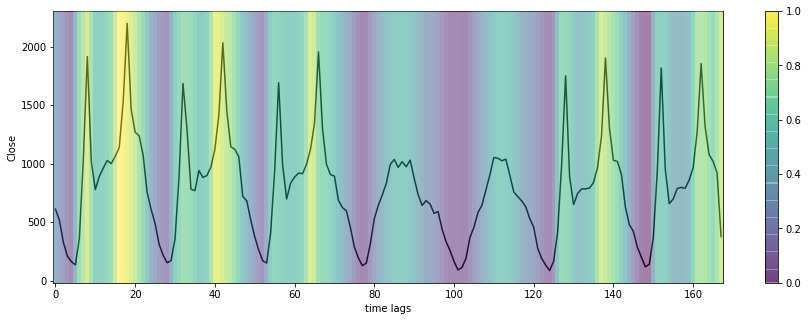

In [342]:
from scipy.ndimage import zoom
import random
import pylab

from tensorflow.keras import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

In [294]:
wed

[3, 10, 17, 24]

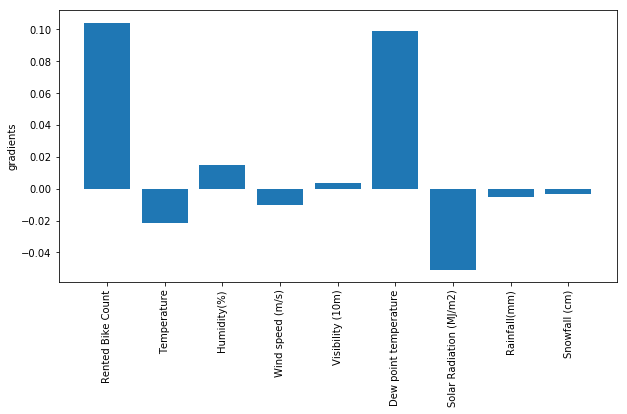

In [307]:
columns=cols
X_test=testX.copy()
id_=24*3+12
grad_imp = gradient_importance(X_test[id_], model)

SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [343]:
id_=24*3+12

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([ 434.,  326.,  184.,  123.,  117.,  161.,  436., 1070., 1888.,
       1021.,  771.,  796.,  737.,  815.,  838.,  884., 1069., 1274.,
       1987., 1377., 1026.,  979.,  906.,  658.,  488.,  440.,  283.,
        182.,  150.,  162.,  394., 1005., 1883.,  982.,  684.,  782.,
        881.,  847.,  903.,  965., 1110., 1357., 2074., 1442., 1186.,
       1147.,  948.,  527.,  294.,  324.,  287.,  227.,  146.,  141.,
        402., 1060., 1907.,  996.,  717.,  818.,  907.,  983.,  963.,
        994., 1185., 1462., 2094., 1507., 1176., 1069., 1088.,  798.,
        584.,  524.,  362.,  242.,  147.,  154.,  433., 1055., 1899.,
       1011.,  696.,  852.,  926.,  968., 1040., 1094., 1206., 1569.,
       2254., 1561., 1269., 1197., 1115.,  806.,  642.,  560.,  369.,
        251.,  166.,  153.,  403., 1024., 1906., 1027.,  751.,  880.,
       1023., 1130., 1160., 1251., 1424., 1730., 2314., 1568., 1242.,
       1146., 1106.,  851.,  640.,  585.,  478.,  346.,  233.,  146.,
        197.,  388.,

[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


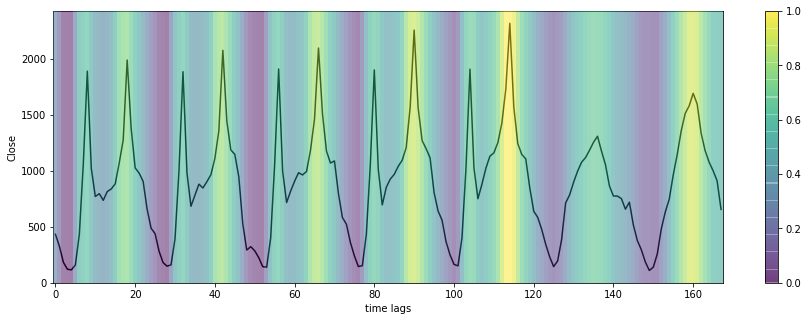

In [344]:
from scipy.ndimage import zoom
import random
import pylab

from tensorflow.keras import Model

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

In [300]:
mon

[1, 8, 15, 22]

In [323]:
id_=24*0+12

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([ 753.,  629.,  434.,  327.,  185.,  178.,  376.,  556.,  556.,
        144.,  191.,   54.,   29.,   18.,  147.,  576.,  900., 1386.,
       1882., 1228., 1003.,  542.,  680.,  603.,  640.,  585.,  478.,
        346.,  233.,  146.,  197.,  388.,  713.,  785.,  898.,  996.,
       1076., 1118., 1183., 1254., 1308., 1176., 1054.,  864.,  775.,
        775.,  752.,  658.,  699.,  531.,  450.,  299.,  148.,   27.,
         55.,  134.,   74.,  195.,  330.,  544.,  630.,  916.,  962.,
        948.,  385.,  535.,  651.,  645.,  624.,  670.,  625.,  512.,
        434.,  326.,  184.,  123.,  117.,  161.,  436., 1070., 1888.,
       1021.,  771.,  796.,  737.,  815.,  838.,  884., 1069., 1274.,
       1987., 1377., 1026.,  979.,  906.,  658.,  488.,  440.,  283.,
        182.,  150.,  162.,  394., 1005., 1883.,  982.,  684.,  782.,
        881.,  847.,  903.,  965., 1110., 1357., 2074., 1442., 1186.,
       1147.,  948.,  527.,  294.,  324.,  287.,  227.,  146.,  141.,
        402., 1060.,

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


(-0.5, 167.5, 119.5, -0.5)

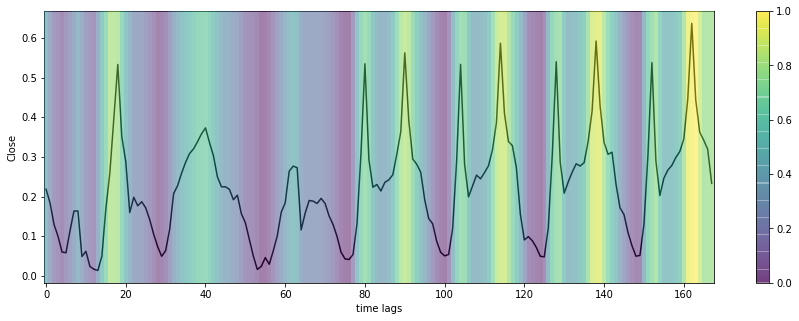

In [324]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(X_test[id_][:,0],'k')
#plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()


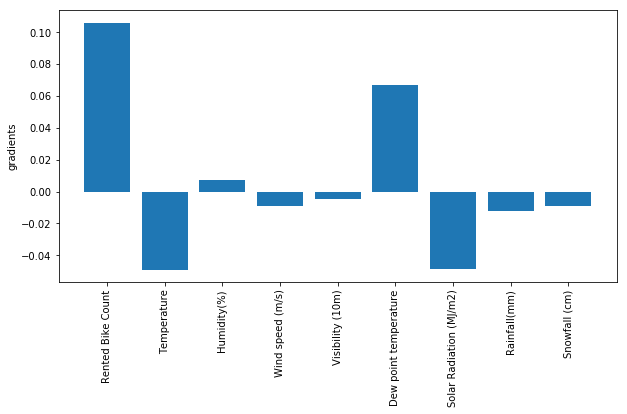

In [306]:
columns=cols
X_test=testX.copy()
id_=24*1+12
grad_imp = gradient_importance(X_test[id_], model)


SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

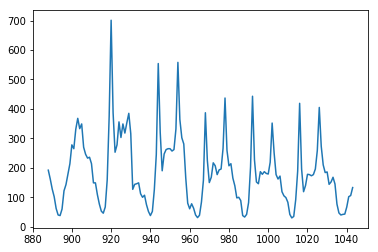

In [52]:
plt.plot(data[val_size+12:val_size+24*7]['Rented Bike Count'])

In [600]:
class CharacterTable(object):
    def __init__(self, chars):
        """Initialize character table.
        # Arguments
            chars: Characters that can appear in the input.
        """
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))

    def encode(self, C, num_rows):
        """One hot encode given string C.
        # Arguments
            num_rows: Number of rows in the returned one hot encoding. This is
                used to keep the # of rows for each data the same.
        """
        x = np.zeros((num_rows, len(self.chars)))
        for i, c in enumerate(C):
            x[i, self.char_indices[c]] = 1
        return x

    def decode(self, x, calc_argmax=True):
        if calc_argmax:
            x = x.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in x)

(1, 48, 8)


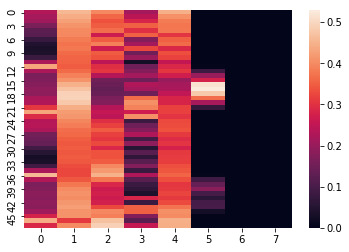

conv1d_2/kernel:0 (5, 8, 64)
[[[-0. -0. -0. ...  0.  0. -0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [-0. -0. -0. ...  0. -0. -0.]
  ...
  [-0.  0.  0. ...  0.  0.  0.]
  [ 0.  0. -0. ... -0.  0. -0.]
  [-0. -0. -0. ... -0.  0.  0.]]

 [[-0.  0. -0. ...  0.  0. -0.]
  [-0. -0. -0. ... -0.  0. -0.]
  [-0.  0. -0. ...  0. -0.  0.]
  ...
  [-0.  0.  0. ... -0.  0.  0.]
  [-0. -0. -0. ... -0. -0. -0.]
  [-0. -0.  0. ... -0.  0. -0.]]

 [[ 0. -0. -0. ...  0.  0.  0.]
  [-0. -0.  0. ... -0. -0. -0.]
  [-0.  0. -0. ... -0.  0.  0.]
  ...
  [-0.  0.  0. ...  0.  0.  0.]
  [-0.  0.  0. ... -0. -0.  0.]
  [ 0.  0. -0. ... -0.  0. -0.]]

 [[ 0. -0.  0. ... -0.  0. -0.]
  [-0.  0. -0. ... -0. -0.  0.]
  [ 0.  0. -0. ...  0.  0.  0.]
  ...
  [ 0. -0.  0. ... -0.  0.  0.]
  [-0. -0.  0. ...  0. -0.  0.]
  [ 0.  0.  0. ... -0.  0. -0.]]

 [[-0.  0.  0. ... -0. -0. -0.]
  [ 0. -0. -0. ... -0. -0.  0.]
  [-0. -0.  0. ... -0. -0.  0.]
  ...
  [-0.  0.  0. ... -0. -0. -0.]
  [-0.  0.  0. ...  0.  0. -0.]
  [ 0

In [37]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = id_
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[0].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

### Timedistributed 1d-CNN

In [65]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))

In [41]:
trainY=np.reshape(trainY,(trainY.shape[0],1,trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],1,valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],1,testY.shape[1],1))

In [42]:
first_input = Input(shape=(None,48,8))

in1=TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu',padding='same'))(first_input)
#in1= BatchNormalization(scale=False)(in1)

#in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu',padding='same'))(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=TimeDistributed(MaxPooling1D(pool_size=2))(in1)
#in1=TimeDistributed(Flatten())(in1)

#in1=Dense(100, activation='relu')(in1)
out=TimeDistributed(Dense(1))(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/bike_time_1dcnn_multistep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model

# fit model9
#history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

# fit model9
history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, None, 48, 8)]     0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 48, 64)      2624      
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 48, 64)      4160      
_________________________________________________________________
time_distributed_10 (TimeDis (None, None, 24, 64)      0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, None, 24, 1)       65        
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________
Train on 6936 samples, validate on 804 samples
Epoch 1/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0

Epoch 32/200
6600/6936 [===========================>..] - ETA: 0s - loss: 0.0223
Epoch 00032: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0222 - val_loss: 0.0411
Epoch 33/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0222
Epoch 00033: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0222 - val_loss: 0.0415
Epoch 34/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0221
Epoch 00034: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0222 - val_loss: 0.0413
Epoch 35/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0221
Epoch 00035: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0221 - val_loss: 0.0413
Epoch 36/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0221
Epoch 00036: va

6500/6936 [===========================>..] - ETA: 0s - loss: 0.0211
Epoch 00104: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0211 - val_loss: 0.0428
Epoch 105/200
6600/6936 [===========================>..] - ETA: 0s - loss: 0.0211
Epoch 00105: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 34us/sample - loss: 0.0211 - val_loss: 0.0429
Epoch 106/200
6400/6936 [==========================>...] - ETA: 0s - loss: 0.0211
Epoch 00106: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0211 - val_loss: 0.0431
Epoch 107/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0210
Epoch 00107: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0210 - val_loss: 0.0427
Epoch 108/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0211
Epoch 00108: val_loss di

6600/6936 [===========================>..] - ETA: 0s - loss: 0.0206
Epoch 00176: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0206 - val_loss: 0.0434
Epoch 177/200
6700/6936 [===========================>..] - ETA: 0s - loss: 0.0206
Epoch 00177: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 34us/sample - loss: 0.0206 - val_loss: 0.0434
Epoch 178/200
6600/6936 [===========================>..] - ETA: 0s - loss: 0.0204
Epoch 00178: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0205 - val_loss: 0.0434
Epoch 179/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0206
Epoch 00179: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0205 - val_loss: 0.0445
Epoch 180/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0206
Epoch 00180: val_loss di

In [43]:
model.load_weights("saved_weights/bike_time_1dcnn_multistep.hdf5")

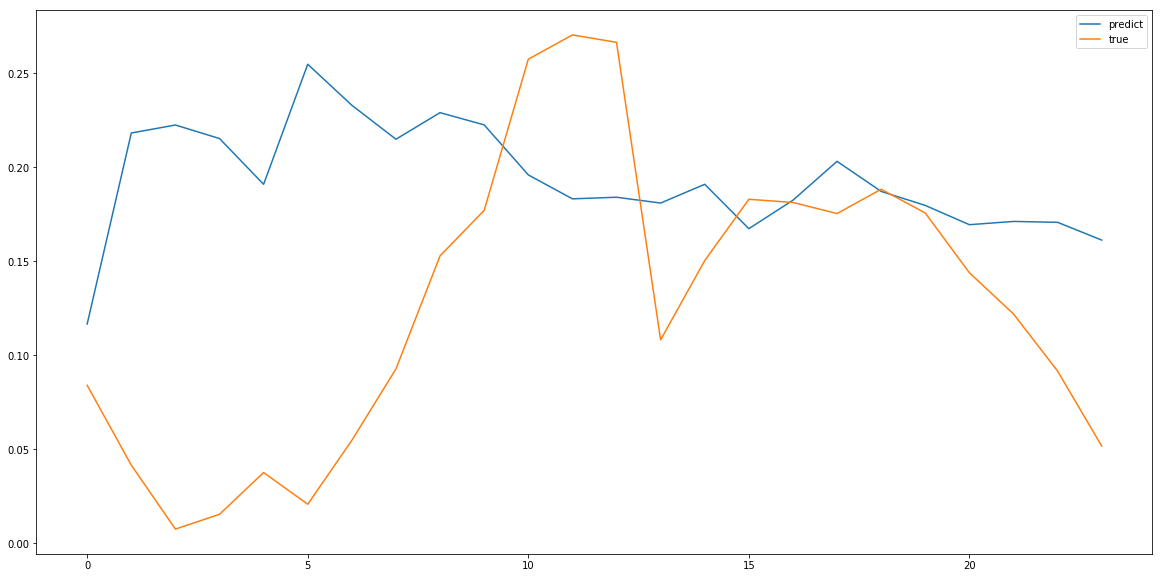

Test RMSE: 0.11160
Test MAE: 0.08716
Test MSE: 0.01246
Test RMSE: 400.27653
Test MAE: 312.60864


In [44]:
#timedist 1dcnn(5,3,1)

from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[15]
testy=testY[15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)



### Bidirectional LSTM

In [49]:
from tensorflow.keras.models import Model

first_input = Input(shape=(48,8))


in1=Bidirectional(LSTM(150))(first_input)
in1=Dense(24,activation='relu')(in1)
model=Model(first_input,in1)
model.compile(optimizer='adam', loss='mse')
model.summary()
checkpoint_path = "saved_weights/bike_timebilstm.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model
model.fit(trainX, trainY,validation_data=[valX,valY], epochs=200, verbose=1,callbacks=[cb])

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 48, 8)]           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300)               190800    
_________________________________________________________________
dense_14 (Dense)             (None, 24)                7224      
Total params: 198,024
Trainable params: 198,024
Non-trainable params: 0
_________________________________________________________________
Train on 6936 samples, validate on 804 samples
Epoch 1/200
6912/6936 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00001: val_loss improved from inf to 0.02981, saving model to saved_weights/bike_timebilstm.hdf5
6936/6936 [==============================] - 7s 1ms/sample - loss: 0.0188 - val_loss: 0.0298
Epoch 2/200
6848/6936 [============================>.] - ET

KeyboardInterrupt: 

In [50]:
model.load_weights("saved_weights/bike_timebilstm.hdf5")

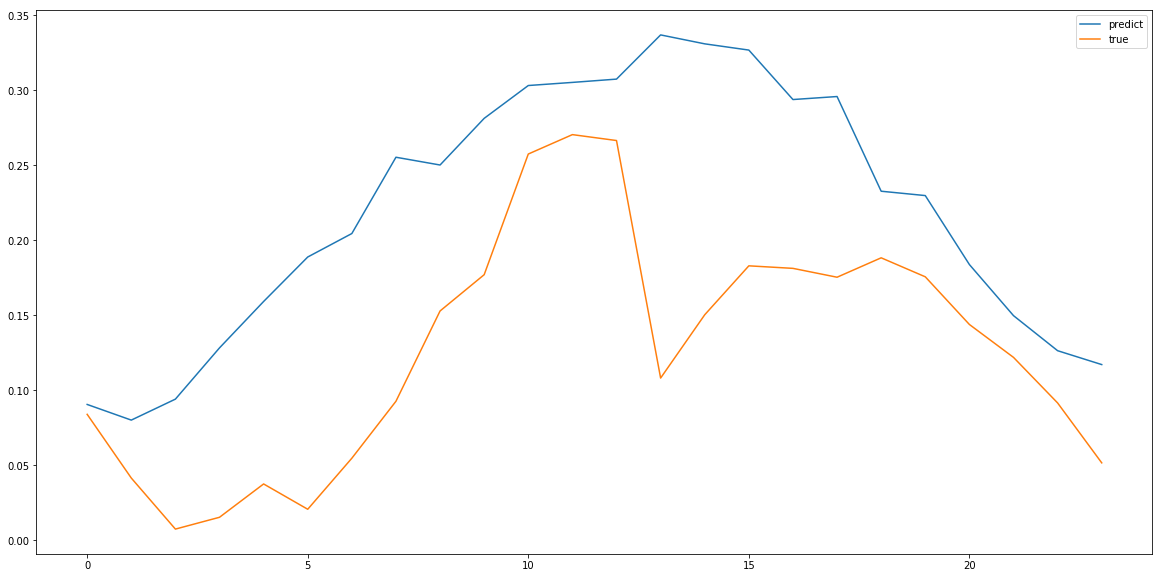

Test RMSE: 0.10889
Test MAE: 0.09261
Test MSE: 0.01186
Test RMSE: 390.56252
Test MAE: 332.14767


In [52]:

from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[15]
testy=testY[15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


### 1d-CNN

In [138]:
first_input = Input(shape=(168,9))

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/bike_1dcnn_multi_exp1.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 168, 9)]          0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 168, 64)           2944      
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 168, 64)           12352     
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 168, 64)           4160      
_________________________________________________________________
extractor (MaxPooling1D)     (None, 84, 64)            0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 5376)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                129

In [358]:
first_input = Input(shape=(168,9))


#in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

in1=add([in0,in1])

in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1= LSTM(64,return_sequences=True)(in1)
#in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1])

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(in1)
in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/bike_1dcnn_multi_rescnn_lstm.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model_54"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           [(None, 168, 9)]     0                                            
__________________________________________________________________________________________________
conv1d_169 (Conv1D)             (None, 168, 64)      1792        input_51[0][0]                   
__________________________________________________________________________________________________
conv1d_170 (Conv1D)             (None, 168, 64)      12352       conv1d_169[0][0]                 
__________________________________________________________________________________________________
conv1d_171 (Conv1D)             (None, 168, 64)      4160        conv1d_170[0][0]                 
___________________________________________________________________________________________

In [233]:
model.fit(trainX, trainY,validation_data=[valX,valY],epochs=200, verbose=1,callbacks=[cb])

Train on 6816 samples, validate on 684 samples
Epoch 1/200
6752/6816 [============================>.] - ETA: 0s - loss: 0.0156
Epoch 00001: val_loss improved from inf to 0.01393, saving model to saved_weights/bike_1dcnn_multi_rescnn_lstm.hdf5
6816/6816 [==============================] - 9s 1ms/sample - loss: 0.0156 - val_loss: 0.0139
Epoch 2/200
6752/6816 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00002: val_loss improved from 0.01393 to 0.01225, saving model to saved_weights/bike_1dcnn_multi_rescnn_lstm.hdf5
6816/6816 [==============================] - 7s 960us/sample - loss: 0.0104 - val_loss: 0.0123
Epoch 3/200
6752/6816 [============================>.] - ETA: 0s - loss: 0.0087
Epoch 00003: val_loss improved from 0.01225 to 0.01191, saving model to saved_weights/bike_1dcnn_multi_rescnn_lstm.hdf5
6816/6816 [==============================] - 7s 962us/sample - loss: 0.0087 - val_loss: 0.0119
Epoch 4/200
6752/6816 [============================>.] - ETA: 0s - loss: 0

KeyboardInterrupt: 

In [359]:
model.load_weights('saved_weights/bike_1dcnn_multi_rescnn_lstm.hdf5')

In [264]:
j

[14, 9, 19, 10, 12, 25, 23, 3, 26, 18, 24, 15, 22, 8, 27]

In [276]:
(len(test)-12)

864

In [255]:
fri=[0,7,14,21]
sat=[1,8,15,22]
sun=[2,9,16,23]
mon=[3,10,17,24]
tue=[4,11,18,25]
wed=[5,12,19,26]
thu=[6,13,20,27]

In [331]:
testX.shape

(684, 168, 9)

In [332]:
data[val_size+12:]

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
888,07/01/2018,192,0,-3.8,48,0.7,1574,-13.2,0.0,0.0,0.0,Winter,No Holiday,Yes
889,07/01/2018,162,1,-3.9,51,0.2,1535,-12.5,0.0,0.0,0.0,Winter,No Holiday,Yes
890,07/01/2018,128,2,-4.4,53,0.3,1594,-12.5,0.0,0.0,0.0,Winter,No Holiday,Yes
891,07/01/2018,102,3,-4.8,56,0.6,1505,-12.2,0.0,0.0,0.0,Winter,No Holiday,Yes
892,07/01/2018,62,4,-5.1,60,0.7,1377,-11.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


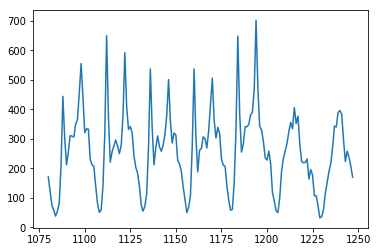

In [340]:
plt.plot(data[val_size+12+24*8:val_size+12+24*8+168]['Rented Bike Count'])

In [339]:
data[val_size+12+24*8:val_size+12+24*8+168]

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1080,15/01/2018,171,0,3.0,60,0.5,842,-4.0,0.0,0.0,0.0,Winter,No Holiday,Yes
1081,15/01/2018,122,1,3.0,62,0.9,835,-3.5,0.0,0.0,0.0,Winter,No Holiday,Yes
1082,15/01/2018,74,2,3.6,65,0.9,959,-2.3,0.0,0.0,0.0,Winter,No Holiday,Yes
1083,15/01/2018,58,3,4.4,70,1.7,928,-0.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1084,15/01/2018,38,4,4.9,73,1.8,881,0.4,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,21/01/2018,223,19,1.3,25,1.3,2000,-16.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1244,21/01/2018,258,20,0.3,27,0.4,2000,-16.5,0.0,0.0,0.0,Winter,No Holiday,Yes
1245,21/01/2018,237,21,-0.1,29,0.5,2000,-16.0,0.0,0.0,0.0,Winter,No Holiday,Yes
1246,21/01/2018,207,22,-0.3,32,0.7,2000,-15.0,0.0,0.0,0.0,Winter,No Holiday,Yes


In [330]:
7884/168

46.92857142857143

## LSTM-CNN

In [27]:
first_input = Input(shape=(168,9))


in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)


#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1= BatchNormalization(scale=False)(in1)




in1=Flatten()(in1)
#in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/bike_lstmcnn_multi.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 168, 9)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 168, 64)           18944     
_________________________________________________________________
conv1d (Conv1D)              (None, 168, 64)           12352     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 168, 64)           8256      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 168, 64)           4160      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 168, 64)           12352     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 168, 64)           8256  

In [376]:
hist=model.fit(trainX, trainY,validation_data=[valX,valY],epochs=30, verbose=1,callbacks=[cb])

Train on 6816 samples, validate on 684 samples
Epoch 1/30
6752/6816 [============================>.] - ETA: 0s - loss: 0.0152
Epoch 00001: val_loss improved from inf to 0.01265, saving model to saved_weights/bike_lstmcnn_multi.hdf5
6816/6816 [==============================] - 12s 2ms/sample - loss: 0.0152 - val_loss: 0.0126
Epoch 2/30
6752/6816 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00002: val_loss improved from 0.01265 to 0.01249, saving model to saved_weights/bike_lstmcnn_multi.hdf5
6816/6816 [==============================] - 11s 2ms/sample - loss: 0.0090 - val_loss: 0.0125
Epoch 3/30
6752/6816 [============================>.] - ETA: 0s - loss: 0.0075
Epoch 00003: val_loss improved from 0.01249 to 0.01125, saving model to saved_weights/bike_lstmcnn_multi.hdf5
6816/6816 [==============================] - 10s 2ms/sample - loss: 0.0075 - val_loss: 0.0112
Epoch 4/30
6784/6816 [============================>.] - ETA: 0s - loss: 0.0064
Epoch 00004: val_loss improve

KeyboardInterrupt: 

In [28]:
model.load_weights('saved_weights/bike_lstmcnn_multi.hdf5')

In [399]:
aug_rm=[]
aug_ma=[]
rm1=[]
ma1=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+12]
        testy=testY[24*k+12]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm1.append(np.mean(aug_rm))
    ma1.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.05286
Test RMSE: 0.07154
Test MAE: 0.07492
Test RMSE: 0.09351
Test MAE: 0.03549
Test RMSE: 0.04751
Test MAE: 0.03049
Test RMSE: 0.03794
0.06262211047277676
0.048438497
Test MAE: 0.03396
Test RMSE: 0.04095
Test MAE: 0.04698
Test RMSE: 0.06136
Test MAE: 0.03605
Test RMSE: 0.04129
Test MAE: 0.02404
Test RMSE: 0.03157
0.05320700596015365
0.041847356
Test MAE: 0.03317
Test RMSE: 0.04351
Test MAE: 0.04649
Test RMSE: 0.06746
Test MAE: 0.05065
Test RMSE: 0.06002
Test MAE: 0.07041
Test RMSE: 0.07761
0.056188332991982864
0.044624057
Test MAE: 0.15273
Test RMSE: 0.18271
Test MAE: 0.05126
Test RMSE: 0.08015
Test MAE: 0.03018
Test RMSE: 0.03938
Test MAE: 0.06049
Test RMSE: 0.07092
0.06546329027140929
0.05188395
Test MAE: 0.09296
Test RMSE: 0.11350
Test MAE: 0.17729
Test RMSE: 0.19452
Test MAE: 0.07046
Test RMSE: 0.07964
Test MAE: 0.03249
Test RMSE: 0.04253
0.07388073696175232
0.0601677
Test MAE: 0.04476
Test RMSE: 0.05970
Test MAE: 0.14459
Test RMSE: 0.15914
Test MAE: 0.06011
Test RMSE:

In [258]:
aug_rm=[]
aug_ma=[]
rmm=[]
maa=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+12]
        testy=testY[24*k+12]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rmm.append(np.mean(aug_rm))
    maa.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.04793
Test RMSE: 0.06711
Test MAE: 0.08919
Test RMSE: 0.11262
Test MAE: 0.03505
Test RMSE: 0.05090
Test MAE: 0.04182
Test RMSE: 0.05635
0.0717437525294239
0.05349614
Test MAE: 0.03125
Test RMSE: 0.03881
Test MAE: 0.05763
Test RMSE: 0.08227
Test MAE: 0.02530
Test RMSE: 0.03471
Test MAE: 0.02759
Test RMSE: 0.03742
0.060022641810082565
0.044469934
Test MAE: 0.05944
Test RMSE: 0.07091
Test MAE: 0.05698
Test RMSE: 0.07618
Test MAE: 0.03519
Test RMSE: 0.04177
Test MAE: 0.05418
Test RMSE: 0.06436
0.061116176589442024
0.04679537
Test MAE: 0.15698
Test RMSE: 0.19475
Test MAE: 0.04821
Test RMSE: 0.06391
Test MAE: 0.02635
Test RMSE: 0.03584
Test MAE: 0.05854
Test RMSE: 0.07132
0.06870057420192396
0.05322699
Test MAE: 0.07168
Test RMSE: 0.09145
Test MAE: 0.16826
Test RMSE: 0.18859
Test MAE: 0.02883
Test RMSE: 0.04068
Test MAE: 0.02710
Test RMSE: 0.03724
0.07285855940387964
0.057374947
Test MAE: 0.04351
Test RMSE: 0.05272
Test MAE: 0.12079
Test RMSE: 0.12886
Test MAE: 0.05121
Test RMSE:

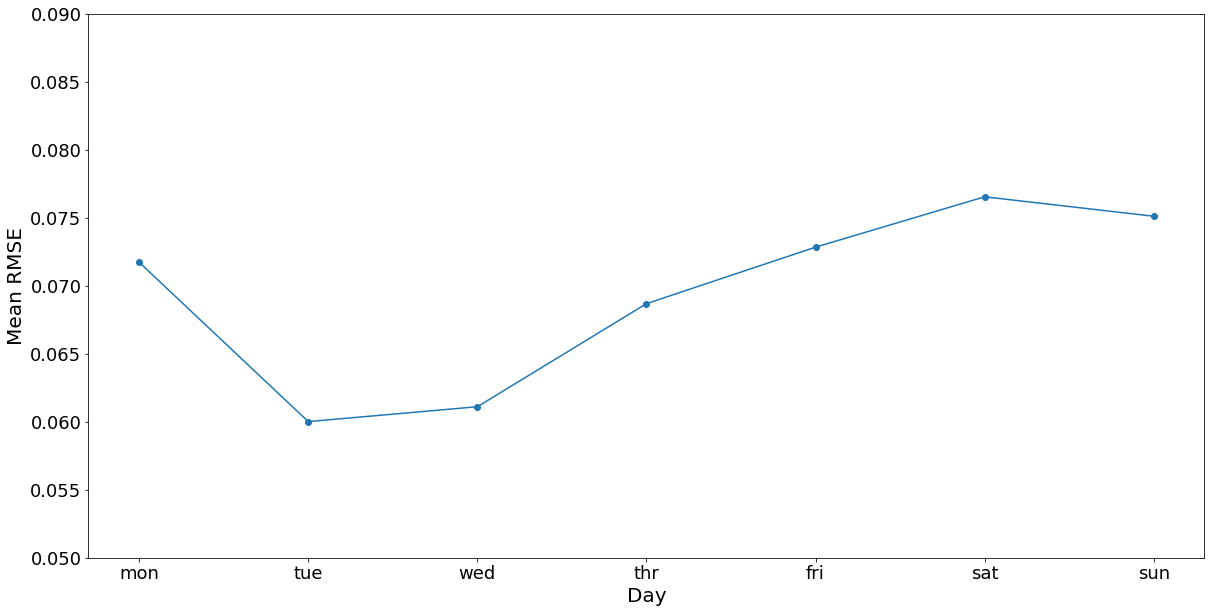

In [275]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, rmm, marker='o', label='lstm-cnn')
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
plt.ylim(0.05,0.09)
#plt.ylim(0.032,0.04)

pyplot.show()

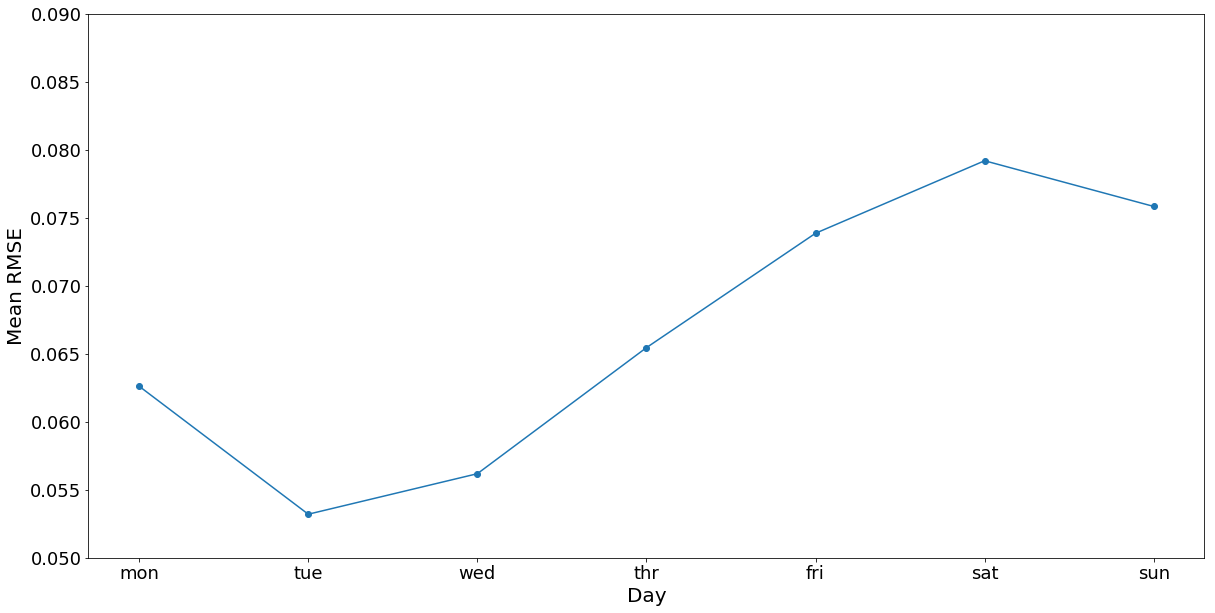

In [380]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, rm1, marker='o', label='lstm-cnn')
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
plt.ylim(0.05,0.09)
#plt.ylim(0.032,0.04)

pyplot.show()

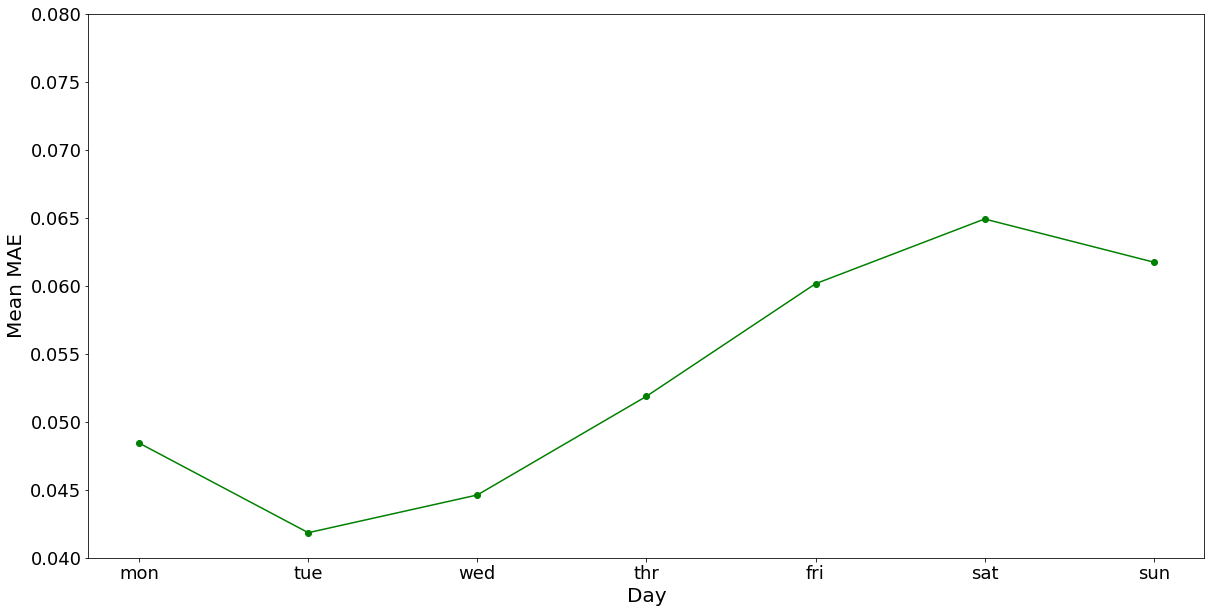

In [383]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, ma1,'g', marker='o', label='lstm-cnn')
plt.ylabel('Mean MAE')
plt.xlabel('Day')
plt.ylim(0.04,0.08)

pyplot.show()

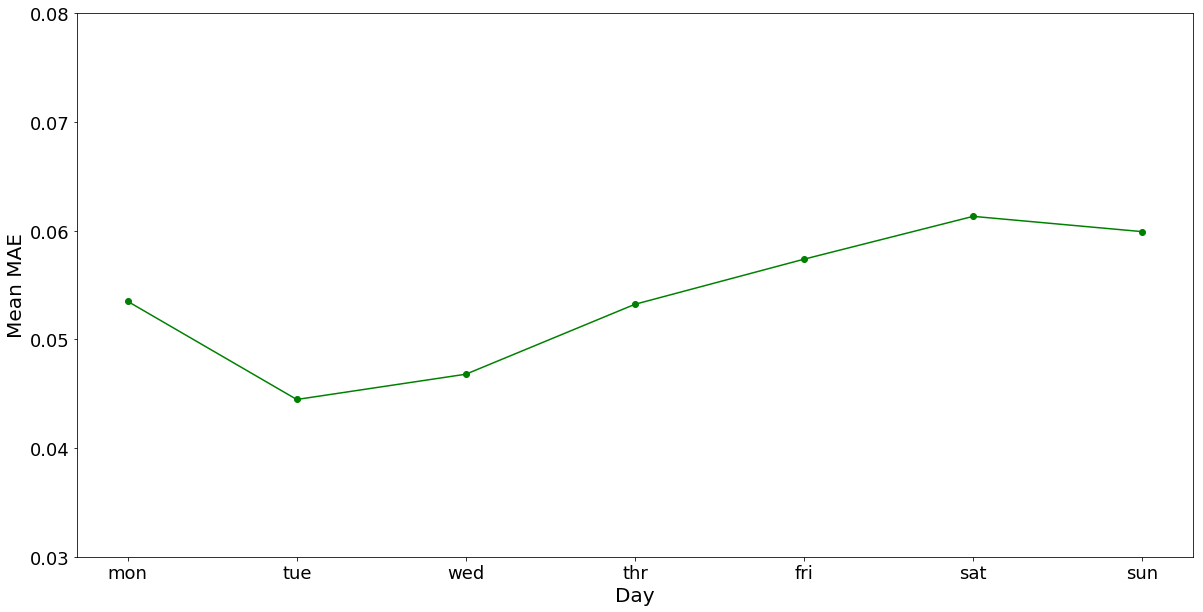

In [280]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, maa,'g', marker='o', label='lstm-cnn')
plt.ylabel('Mean MAE')
plt.xlabel('Day')
plt.ylim(0.03,0.08)

pyplot.show()

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(1, 168, 64)


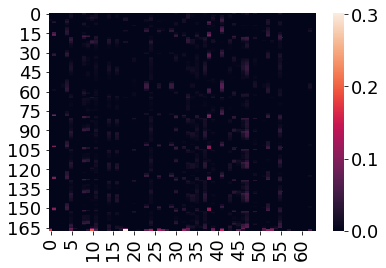

lstm_61/kernel:0 (9, 256)
[[ 0. -0.  0. ... -0.  0.  0.]
 [-0.  0.  0. ... -0.  0.  0.]
 [ 0. -0.  0. ... -0. -0.  0.]
 ...
 [-0. -0. -0. ...  0. -0. -0.]
 [-0.  0.  0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]]
lstm_61/recurrent_kernel:0 (64, 256)
[[ 0.  0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0. -0.  0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 ...
 [ 0. -0. -0. ... -0. -0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0. -0.  0.]]
lstm_61/bias:0 (256,)
[-0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0.
  0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  0.  0.  0.  0.
  0. -0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.
  0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.

In [630]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = 10
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[7].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output)
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

In [619]:
model.layers

## Residual LSTM-CNN

In [386]:
aug_rm=[]
aug_ma=[]
for k in sun:

    yhat = model.predict([testX])
    yhat=yhat[24*k+12]
    testy=testY[24*k+12]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.05340
Test RMSE: 0.07359
Test MAE: 0.16137
Test RMSE: 0.17894
Test MAE: 0.04340
Test RMSE: 0.05685
Test MAE: 0.03085
Test RMSE: 0.03678
0.0865393279241613
0.072254665


In [387]:
aug_rm=[]
aug_ma=[]
for k in mon:

    yhat = model.predict([testX])
    yhat=yhat[24*k+12]
    testy=testY[24*k+12]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.04621
Test RMSE: 0.06795
Test MAE: 0.11645
Test RMSE: 0.13054
Test MAE: 0.07316
Test RMSE: 0.09174
Test MAE: 0.13279
Test RMSE: 0.15638
0.11165127761891602
0.09215069


In [388]:
aug_rm=[]
aug_ma=[]
for k in tue:

    yhat = model.predict([testX])
    yhat=yhat[24*k+12]
    testy=testY[24*k+12]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.04041
Test RMSE: 0.05560
Test MAE: 0.07010
Test RMSE: 0.08869
Test MAE: 0.05787
Test RMSE: 0.06998
Test MAE: 0.03977
Test RMSE: 0.04737
0.06541066873520247
0.05203575


In [389]:
aug_rm=[]
aug_ma=[]
for k in wed:

    yhat = model.predict([testX])
    yhat=yhat[24*k+12]
    testy=testY[24*k+12]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.03030
Test RMSE: 0.05069
Test MAE: 0.05135
Test RMSE: 0.06211
Test MAE: 0.04083
Test RMSE: 0.05442
Test MAE: 0.02556
Test RMSE: 0.03493
0.05053963125240299
0.03700923


In [390]:
aug_rm=[]
aug_ma=[]
for k in thu:

    yhat = model.predict([testX])
    yhat=yhat[24*k+12]
    testy=testY[24*k+12]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.05291
Test RMSE: 0.05910
Test MAE: 0.03039
Test RMSE: 0.04880
Test MAE: 0.04775
Test RMSE: 0.05151
Test MAE: 0.03604
Test RMSE: 0.04329
0.05067536364445463
0.041772593


In [391]:
aug_rm=[]
aug_ma=[]
for k in fri:

    yhat = model.predict([testX])
    yhat=yhat[24*k+12]
    testy=testY[24*k+12]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.06452
Test RMSE: 0.07507
Test MAE: 0.03187
Test RMSE: 0.05417
Test MAE: 0.03821
Test RMSE: 0.04980
Test MAE: 0.02562
Test RMSE: 0.03425
0.0533220714707122
0.04005391


In [392]:
aug_rm=[]
aug_ma=[]
for k in sat:

    yhat = model.predict([testX])
    yhat=yhat[24*k+12]
    testy=testY[24*k+12]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.18175
Test RMSE: 0.22927
Test MAE: 0.04534
Test RMSE: 0.06284
Test MAE: 0.04331
Test RMSE: 0.05283
Test MAE: 0.03619
Test RMSE: 0.05128
0.0990564400276545
0.07664771


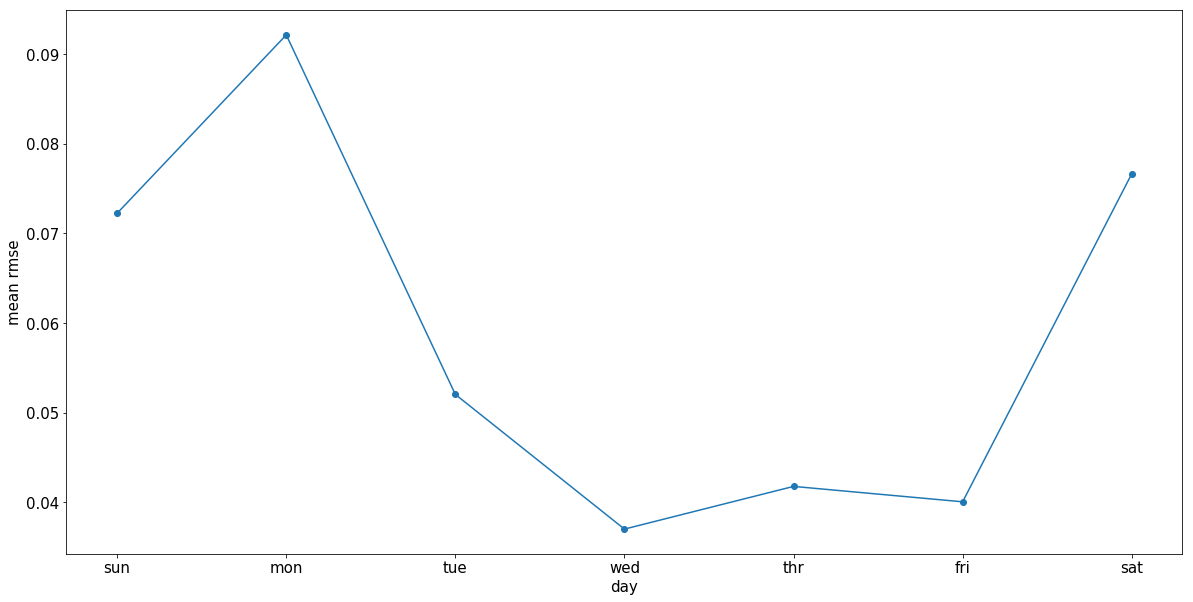

In [393]:
plt.figure(figsize=(20,10))

days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']

scores=[0.072254665,0.09215069,0.05203575, 0.03700923,0.041772593,0.04005391,0.07664771]
pyplot.plot(days, scores, marker='o', label='reslstm-cnn')
plt.ylabel('mean rmse')
plt.xlabel('day')
pyplot.show()

# residual Lstm-CNN

In [621]:
first_input = Input(shape=(168,9))


in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad=add([in0,in1],name='extractor1')

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad1=add([in0,in1])


#in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([ad1,in1],name='extractor2')
#in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1])

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(ad1)
in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/bike_reslstmcnn_multi.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model_228"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_61 (InputLayer)           [(None, 168, 9)]     0                                            
__________________________________________________________________________________________________
lstm_60 (LSTM)                  (None, 168, 64)      18944       input_61[0][0]                   
__________________________________________________________________________________________________
conv1d_352 (Conv1D)             (None, 168, 64)      12352       lstm_60[0][0]                    
__________________________________________________________________________________________________
conv1d_353 (Conv1D)             (None, 168, 64)      8256        conv1d_352[0][0]                 
__________________________________________________________________________________________

In [426]:
hist=model.fit(trainX, trainY,validation_data=[valX,valY],epochs=30, verbose=1,callbacks=[cb])

Train on 6816 samples, validate on 684 samples
Epoch 1/30
6752/6816 [============================>.] - ETA: 0s - loss: 0.0251
Epoch 00001: val_loss improved from inf to 0.02710, saving model to saved_weights/bike_reslstmcnn_experi.hdf5
6816/6816 [==============================] - 12s 2ms/sample - loss: 0.0250 - val_loss: 0.0271
Epoch 2/30
6784/6816 [============================>.] - ETA: 0s - loss: 0.0178
Epoch 00002: val_loss improved from 0.02710 to 0.02635, saving model to saved_weights/bike_reslstmcnn_experi.hdf5
6816/6816 [==============================] - 11s 2ms/sample - loss: 0.0178 - val_loss: 0.0263
Epoch 3/30
6784/6816 [============================>.] - ETA: 0s - loss: 0.0161
Epoch 00003: val_loss improved from 0.02635 to 0.02586, saving model to saved_weights/bike_reslstmcnn_experi.hdf5
6816/6816 [==============================] - 11s 2ms/sample - loss: 0.0161 - val_loss: 0.0259
Epoch 4/30
6752/6816 [============================>.] - ETA: 0s - loss: 0.0150
Epoch 00004: val_

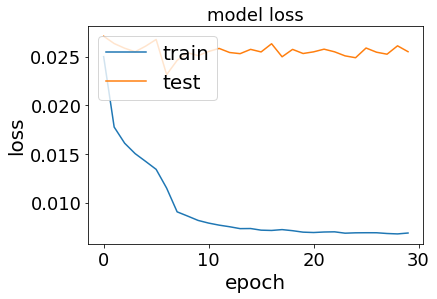

In [427]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [622]:
model.load_weights("saved_weights/bike_1dcnn_multi_exp_addd_5.hdf5")

In [332]:
model.load_weights('saved_weights/bike_lstmcnn_multi.hdf5')

In [436]:
model.load_weights('saved_weights/bike_reslstmcnn_multi.hdf5')

In [407]:
model.load_weights("saved_weights/bike_1dcnn_multi_exp_addd4.hdf5")

In [25]:
j=[14, 9, 19, 10, 12, 25, 23, 3, 26, 18, 24, 15, 22, 8, 27]


In [384]:
j

[14, 9, 19, 10, 12, 25, 23, 3, 26, 18, 24, 15, 22, 8, 27]

In [434]:
##addd3

from math import *
from sklearn.metrics import *

aug_rm=[]
aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k+12]
    testy=testY[24*k+12]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.05311
Test RMSE: 0.05904
Test MAE: 0.05053
Test RMSE: 0.06550
Test MAE: 0.03559
Test RMSE: 0.04326
Test MAE: 0.08828
Test RMSE: 0.11303
Test MAE: 0.03430
Test RMSE: 0.05195
Test MAE: 0.02362
Test RMSE: 0.02781
Test MAE: 0.03416
Test RMSE: 0.04426
Test MAE: 0.04270
Test RMSE: 0.05707
Test MAE: 0.05326
Test RMSE: 0.06134
Test MAE: 0.03508
Test RMSE: 0.03896
Test MAE: 0.01542
Test RMSE: 0.01962
Test MAE: 0.05557
Test RMSE: 0.07181
Test MAE: 0.10405
Test RMSE: 0.11986
Test MAE: 0.12321
Test RMSE: 0.13679
Test MAE: 0.08230
Test RMSE: 0.09203
0.0668219643390509
0.055411477


In [423]:
aug_rm=[]
aug_ma=[]
rm=[]
ma=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+12]
        testy=testY[24*k+12]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm.append(np.mean(aug_rm))
    ma.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.06393
Test RMSE: 0.08180
Test MAE: 0.11137
Test RMSE: 0.12672
Test MAE: 0.04933
Test RMSE: 0.06272
Test MAE: 0.04574
Test RMSE: 0.05400
0.08130805121243766
0.067594305
Test MAE: 0.02961
Test RMSE: 0.03554
Test MAE: 0.05176
Test RMSE: 0.06632
Test MAE: 0.02853
Test RMSE: 0.03239
Test MAE: 0.03642
Test RMSE: 0.04466
0.06301729609789386
0.05208606
Test MAE: 0.03073
Test RMSE: 0.03852
Test MAE: 0.04229
Test RMSE: 0.06267
Test MAE: 0.03844
Test RMSE: 0.04629
Test MAE: 0.06546
Test RMSE: 0.07135
0.060247405524707025
0.049467634
Test MAE: 0.12777
Test RMSE: 0.15669
Test MAE: 0.05186
Test RMSE: 0.07542
Test MAE: 0.03886
Test RMSE: 0.04364
Test MAE: 0.06637
Test RMSE: 0.07721
0.06724588606718021
0.054904714
Test MAE: 0.07850
Test RMSE: 0.09678
Test MAE: 0.20927
Test RMSE: 0.23250
Test MAE: 0.05195
Test RMSE: 0.05647
Test MAE: 0.03095
Test RMSE: 0.03792
0.07497970955435926
0.062457137
Test MAE: 0.03631
Test RMSE: 0.04880
Test MAE: 0.09523
Test RMSE: 0.10961
Test MAE: 0.04751
Test RMS

In [271]:
aug_rm=[]
aug_ma=[]
rm=[]
ma=[]
day=[mon,tue,wed,thu,fri,sat,sun]
for i in day:
    for k in i:

        yhat = model.predict([testX])
        yhat=yhat[24*k+12]
        testy=testY[24*k+12]
        yhat=yhat.reshape(-1,1)
        testy=testy.reshape(-1,1)
        rmse = sqrt(mean_squared_error(testy, yhat))
        mae = mean_absolute_error(testy, yhat)
        print('Test MAE: %.5f' % mae)
        print('Test RMSE: %.5f' % rmse)
        aug_rm.append(rmse)
        aug_ma.append(mae)
    rm.append(np.mean(aug_rm))
    ma.append(np.mean(aug_ma))
        
    

    
    print(np.mean(aug_rm))
    print(np.mean(aug_ma))

Test MAE: 0.04270
Test RMSE: 0.05707
Test MAE: 0.08828
Test RMSE: 0.11303
Test MAE: 0.04381
Test RMSE: 0.05385
Test MAE: 0.01542
Test RMSE: 0.01962
0.06089231530026613
0.047553636
Test MAE: 0.03340
Test RMSE: 0.04079
Test MAE: 0.04867
Test RMSE: 0.06123
Test MAE: 0.03508
Test RMSE: 0.03896
Test MAE: 0.02362
Test RMSE: 0.02781
0.051543708331228275
0.04137371
Test MAE: 0.04662
Test RMSE: 0.05320
Test MAE: 0.03430
Test RMSE: 0.05195
Test MAE: 0.03559
Test RMSE: 0.04326
Test MAE: 0.05326
Test RMSE: 0.06134
0.05184257023822675
0.041730072
Test MAE: 0.14845
Test RMSE: 0.18607
Test MAE: 0.05465
Test RMSE: 0.08046
Test MAE: 0.04050
Test RMSE: 0.04599
Test MAE: 0.08230
Test RMSE: 0.09203
0.06416603852539766
0.05166642
Test MAE: 0.08270
Test RMSE: 0.10345
Test MAE: 0.16674
Test RMSE: 0.18758
Test MAE: 0.05311
Test RMSE: 0.05904
Test MAE: 0.04121
Test RMSE: 0.04712
0.07119258244573701
0.05852125
Test MAE: 0.04045
Test RMSE: 0.05176
Test MAE: 0.12321
Test RMSE: 0.13679
Test MAE: 0.05557
Test RMSE:

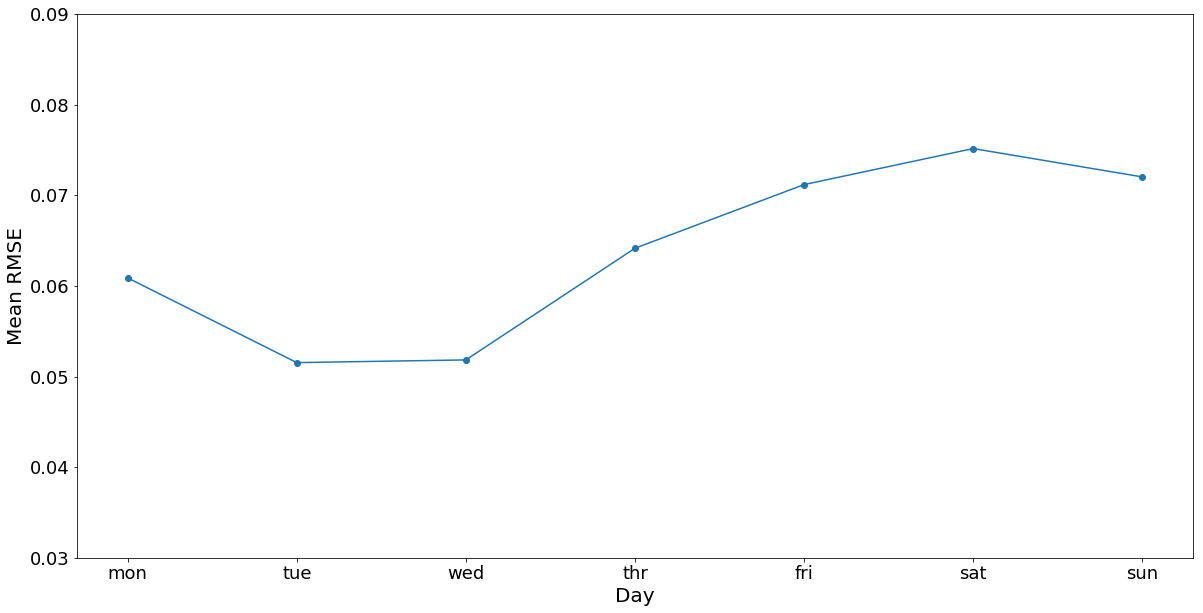

In [414]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, rm, marker='o', label='lstm-cnn')
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
plt.ylim(0.03,0.09)

pyplot.show()

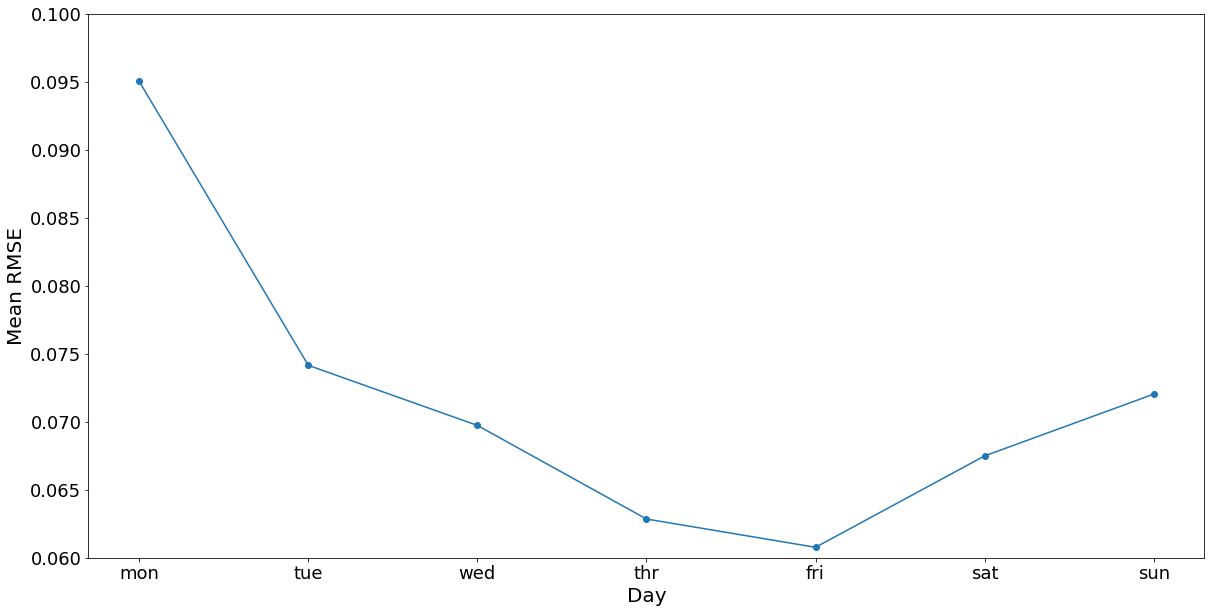

In [228]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, rm, marker='o', label='lstm-cnn')
plt.ylabel('Mean RMSE')
plt.xlabel('Day')
plt.ylim(0.06,0.1)

pyplot.show()

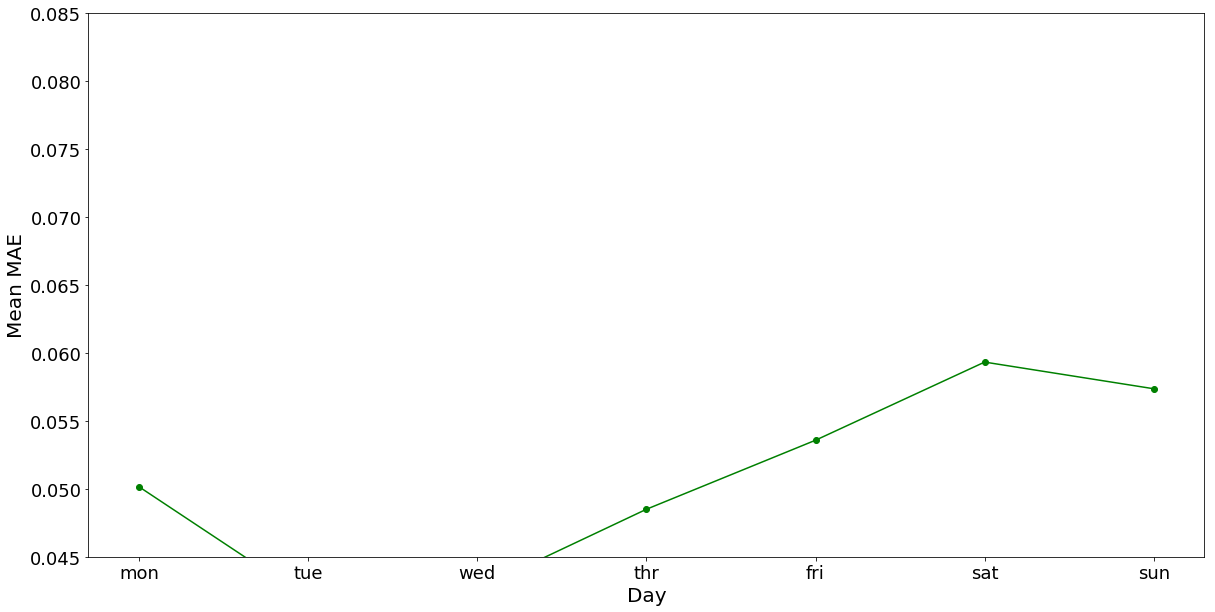

In [309]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, ma,'g', marker='o', label='lstm-cnn')
plt.ylabel('Mean MAE')
plt.xlabel('Day')
plt.ylim(0.045,0.085)

pyplot.show()

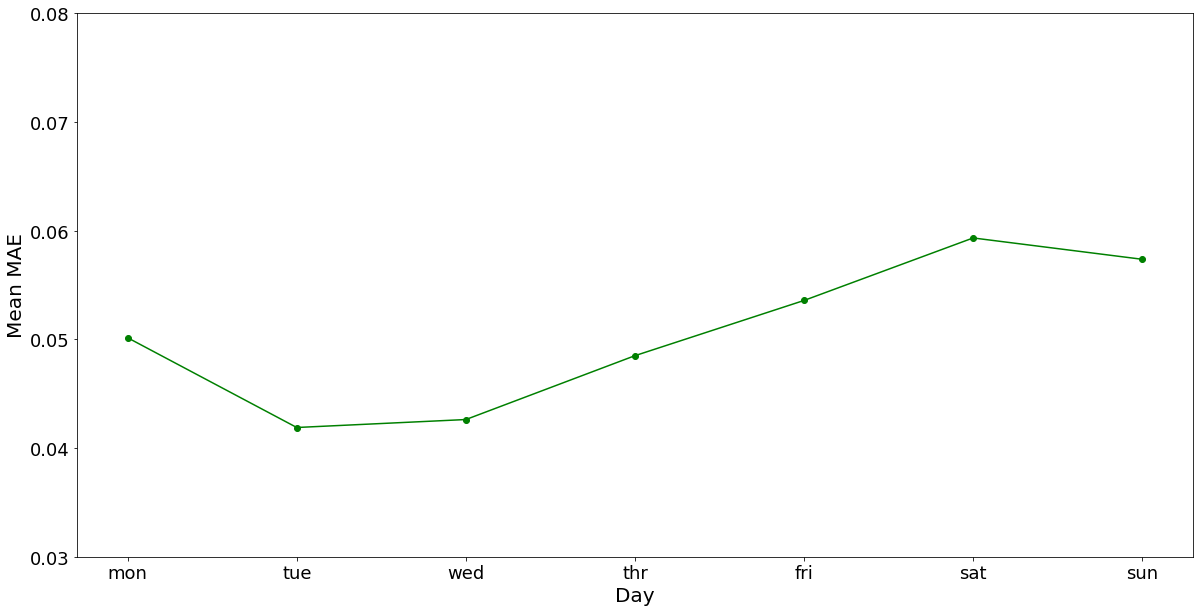

In [310]:
plt.figure(figsize=(20,10))
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat','sun']

pyplot.plot(days, ma,'g', marker='o', label='lstm-cnn')
plt.ylabel('Mean MAE')
plt.xlabel('Day')
plt.ylim(0.03,0.08)

pyplot.show()

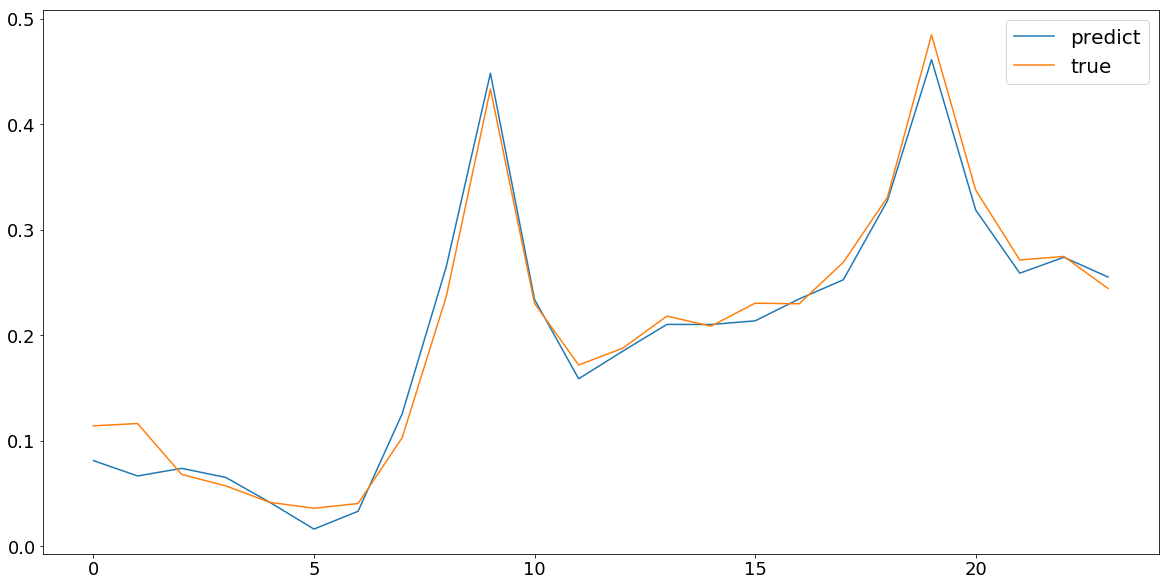

Test RMSE: 0.01788
Test MAE: 0.01361
Test MSE: 0.00032
Test RMSE: 64.13184
Test MAE: 48.79693


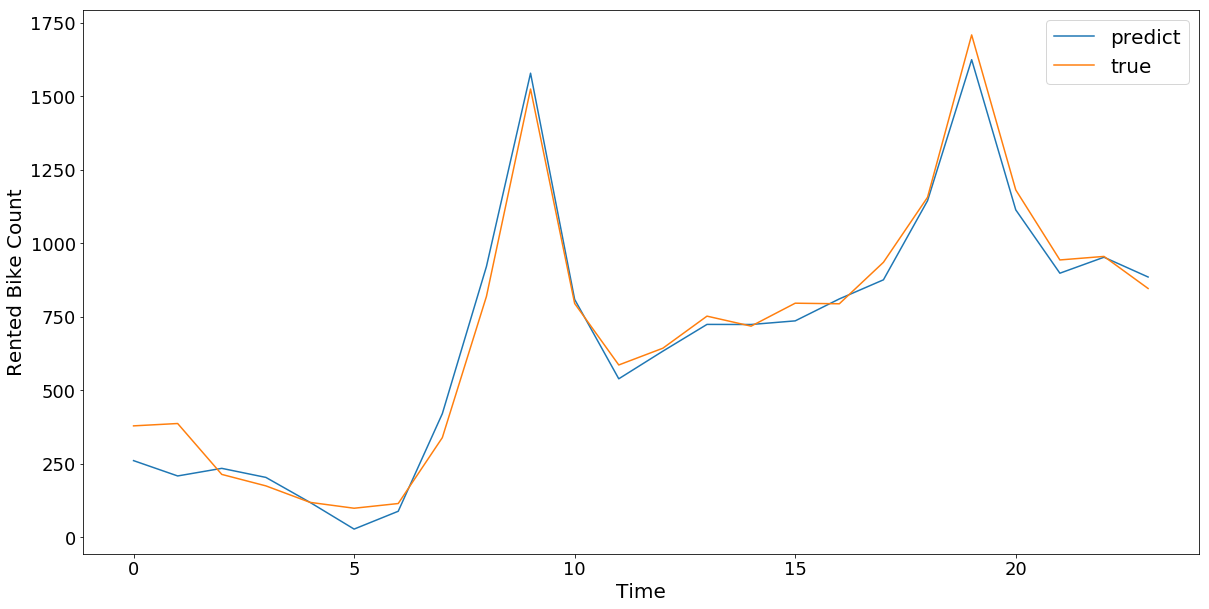

In [395]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*mon[-1]+12]
testy=testY[24*mon[-1]+12]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
plt.xlabel('Time')
plt.ylabel('Rented Bike Count')
pyplot.legend()
pyplot.show()


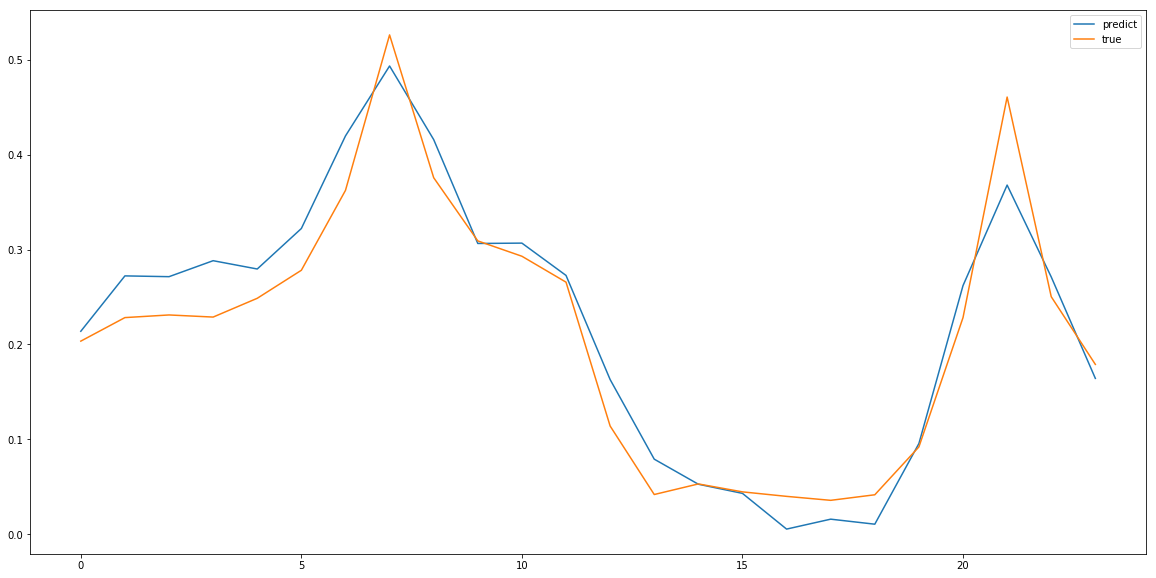

Test RMSE: 0.03713
Test MAE: 0.03010
Test MSE: 0.00138
Test RMSE: 133.17280
Test MAE: 107.95467


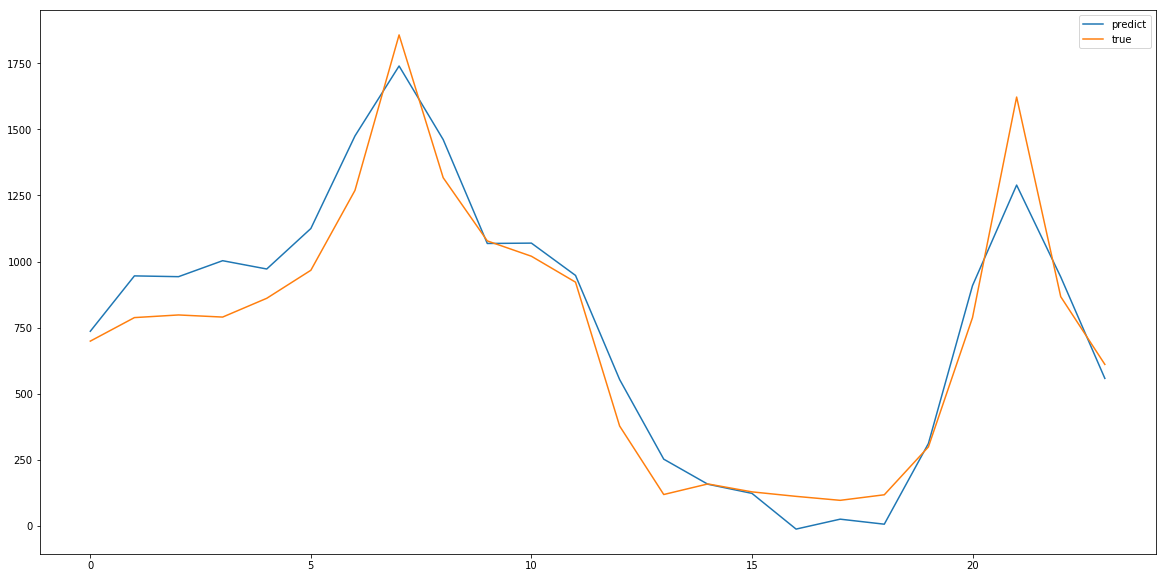

In [76]:
## residual 안넣었을때

from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*19]
testy=testY[24*19]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
pyplot.show()


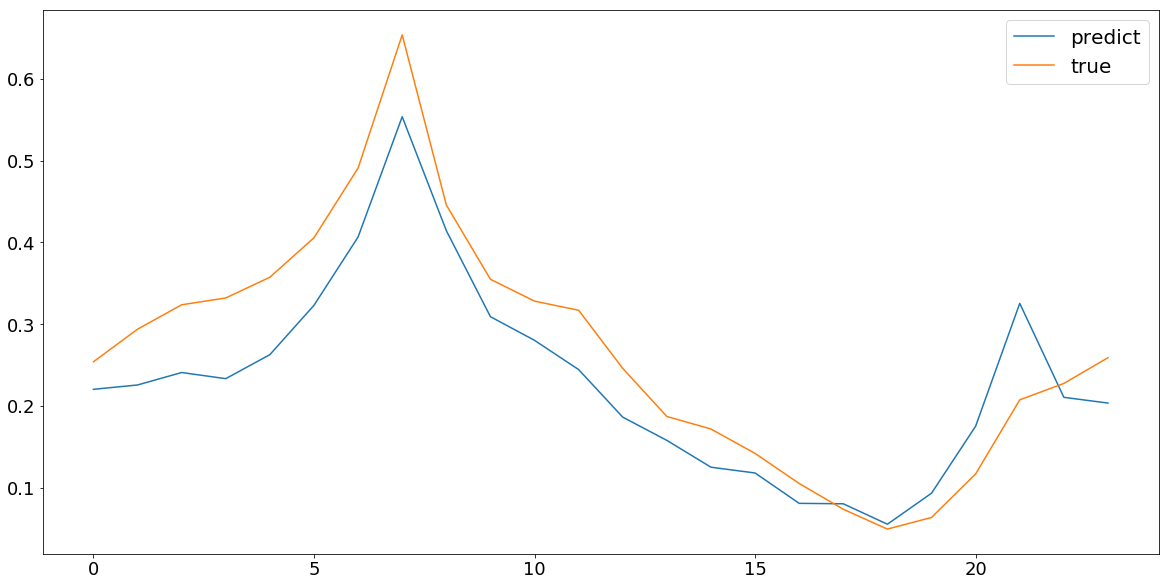

Test RMSE: 0.06305
Test MAE: 0.05492
Test MSE: 0.00398
Test RMSE: 226.12762
Test MAE: 196.96155


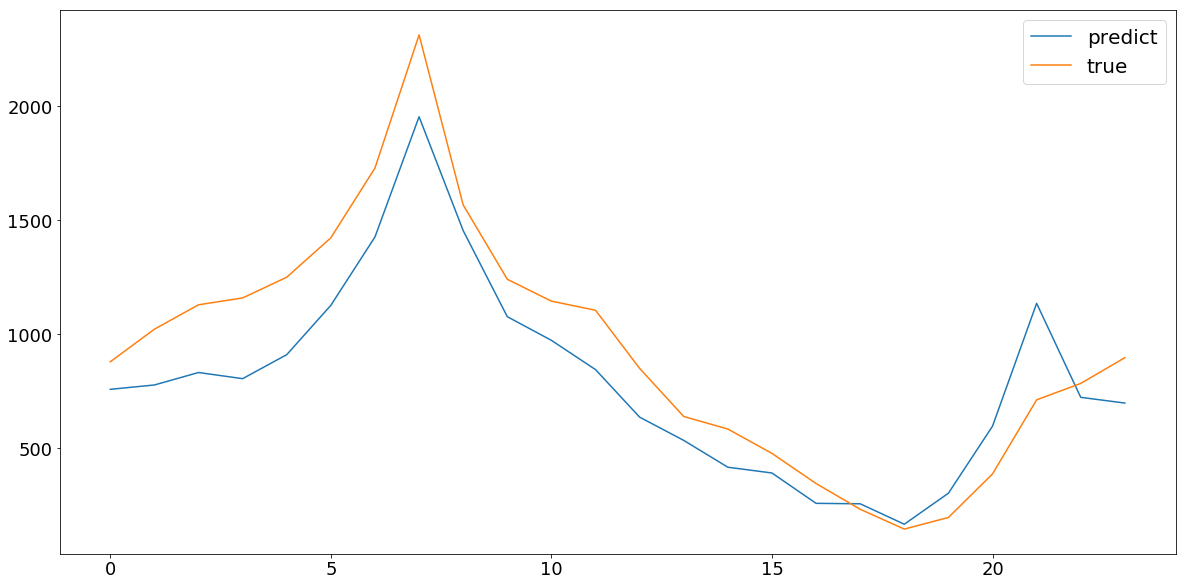

In [459]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*1]
testy=testY[24*1]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
pyplot.show()


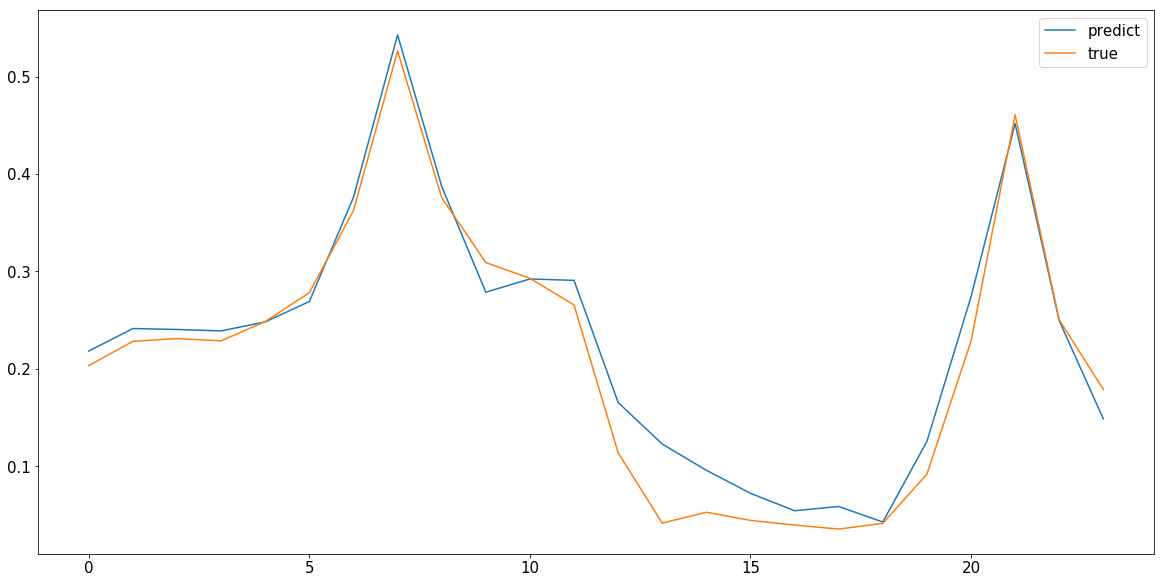

Test RMSE: 0.02862
Test MAE: 0.02155
Test MSE: 0.00082
Test RMSE: 102.64332
Test MAE: 77.28431


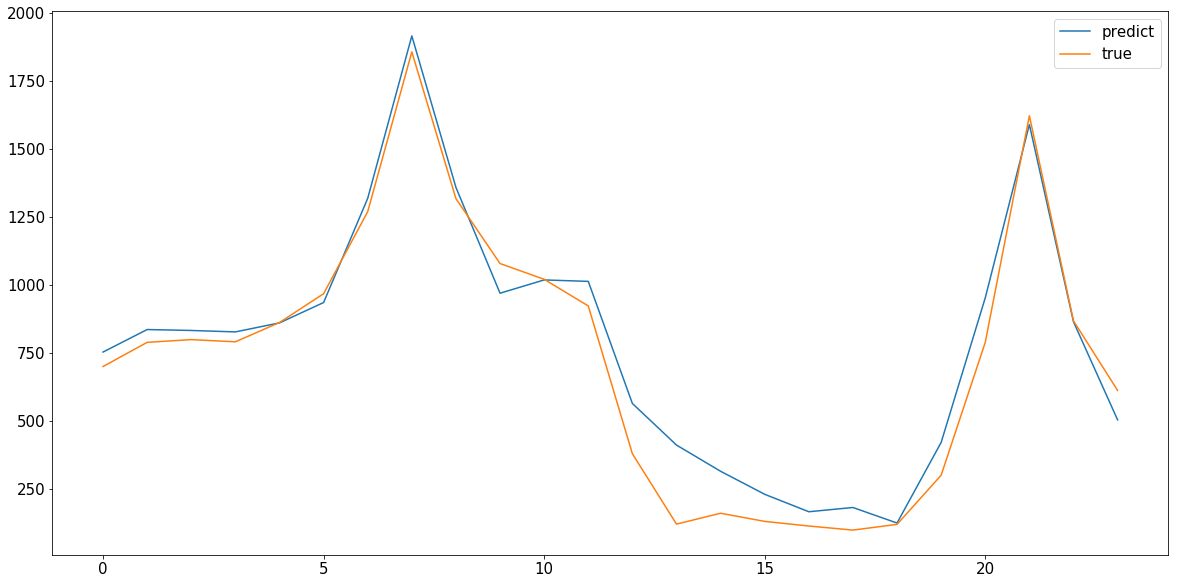

In [453]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*19]
testy=testY[24*19]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
pyplot.show()


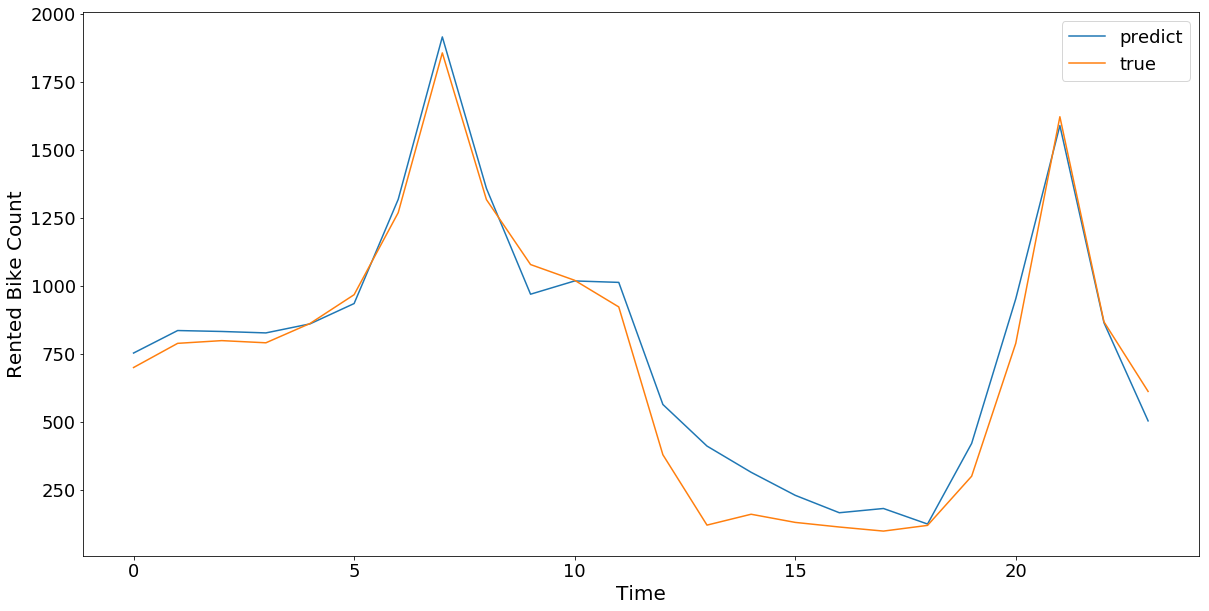

In [455]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')
pyplot.legend()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

plt.xlabel('Time')

plt.ylabel('Rented Bike Count')

pyplot.show()

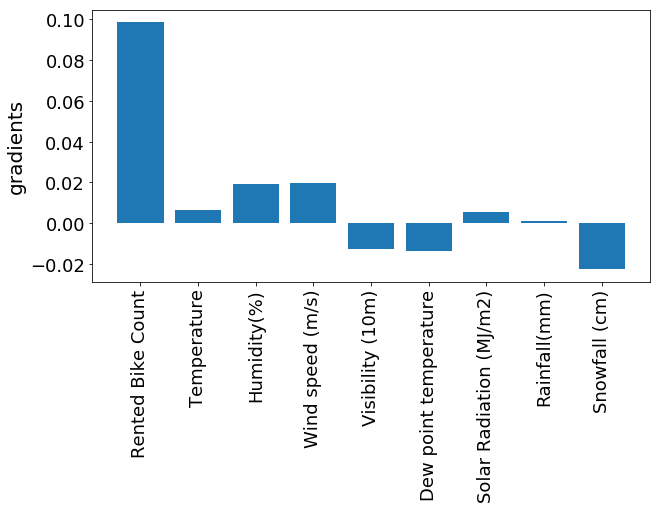

In [400]:

columns=cols
X_test=testX.copy()
id_=24*sat[0]+13
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

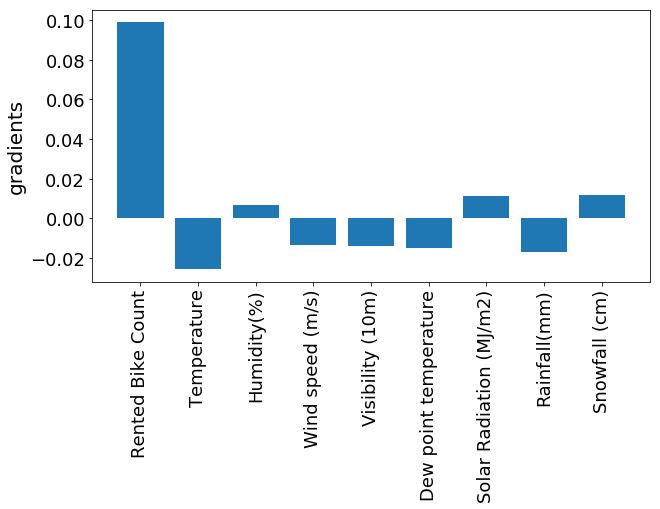

In [365]:
#res
columns=cols
X_test=testX.copy()
id_=24*sat[0]+13
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [401]:

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

#X_test[id_][:,0].shape

array([ 585.,  478.,  346.,  233.,  146.,  197.,  388.,  713.,  785.,
        898.,  996., 1076., 1118., 1183., 1254., 1308., 1176., 1054.,
        864.,  775.,  775.,  752.,  658.,  699.,  531.,  450.,  299.,
        148.,   27.,   55.,  134.,   74.,  195.,  330.,  544.,  630.,
        916.,  962.,  948.,  385.,  535.,  651.,  645.,  624.,  670.,
        625.,  512.,  434.,  326.,  184.,  123.,  117.,  161.,  436.,
       1070., 1888., 1021.,  771.,  796.,  737.,  815.,  838.,  884.,
       1069., 1274., 1987., 1377., 1026.,  979.,  906.,  658.,  488.,
        440.,  283.,  182.,  150.,  162.,  394., 1005., 1883.,  982.,
        684.,  782.,  881.,  847.,  903.,  965., 1110., 1357., 2074.,
       1442., 1186., 1147.,  948.,  527.,  294.,  324.,  287.,  227.,
        146.,  141.,  402., 1060., 1907.,  996.,  717.,  818.,  907.,
        983.,  963.,  994., 1185., 1462., 2094., 1507., 1176., 1069.,
       1088.,  798.,  584.,  524.,  362.,  242.,  147.,  154.,  433.,
       1055., 1899.,

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]


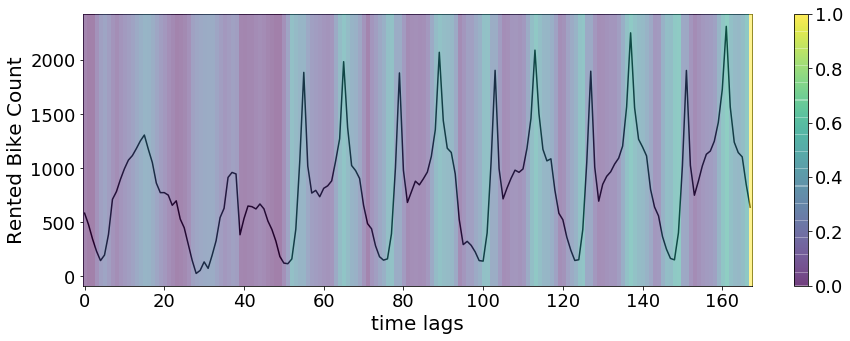

In [402]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Rented Bike Count'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


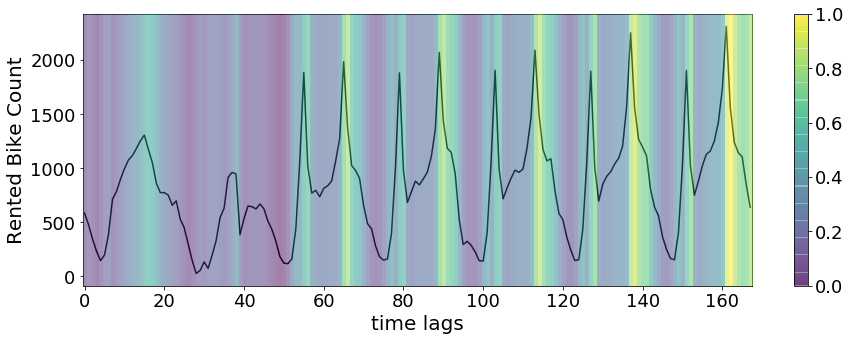

In [367]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Rented Bike Count'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

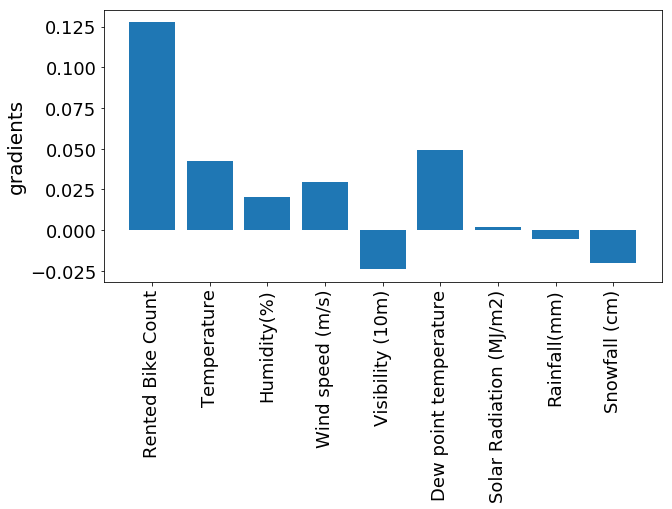

In [403]:
columns=cols
X_test=testX.copy()
id_=24*tue[2]+13
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

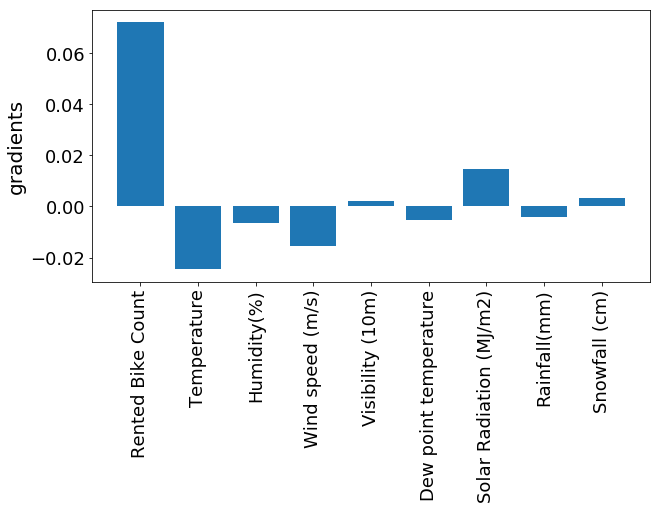

In [368]:
#res
columns=cols
X_test=testX.copy()
id_=24*tue[2]+13
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [404]:

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([ 487.,  330.,  205.,  133.,  162.,  402., 1066., 1910.,  990.,
        710.,  789.,  890.,  912.,  928.,  980., 1188., 1420., 2159.,
       1529., 1208., 1163., 1126.,  718.,  612.,  517.,  327.,  210.,
        164.,  135.,  362., 1047., 1916., 1019.,  779.,  892.,  963.,
       1028., 1001., 1063., 1137., 1532., 2200., 1464., 1269., 1239.,
       1074.,  757.,  610.,  489.,  313.,  219.,  154.,  172.,  357.,
        883., 1686., 1300.,  782.,  770.,  942.,  883.,  899.,  971.,
       1123., 1416., 2034., 1448., 1146., 1123., 1061.,  721.,  683.,
        520.,  376.,  262.,  171.,  151.,  412.,  939., 1692.,  991.,
        699.,  834.,  886.,  920.,  915.,  995., 1126., 1346., 1956.,
       1303.,  995.,  907.,  894.,  687.,  626.,  597.,  456.,  288.,
        195.,  129.,  151.,  315.,  530.,  644.,  733.,  830.,  994.,
       1037.,  969., 1018.,  974., 1031.,  877.,  735.,  644.,  685.,
        655.,  576.,  592.,  443.,  335.,  258.,  165.,   92.,  114.,
        191.,  371.,

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


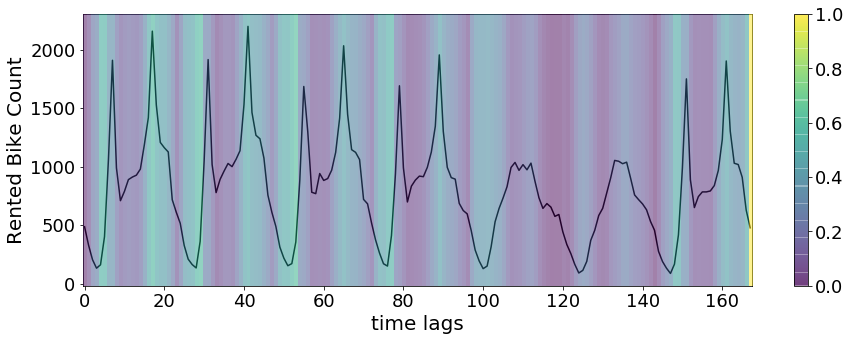

In [405]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Rented Bike Count'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]


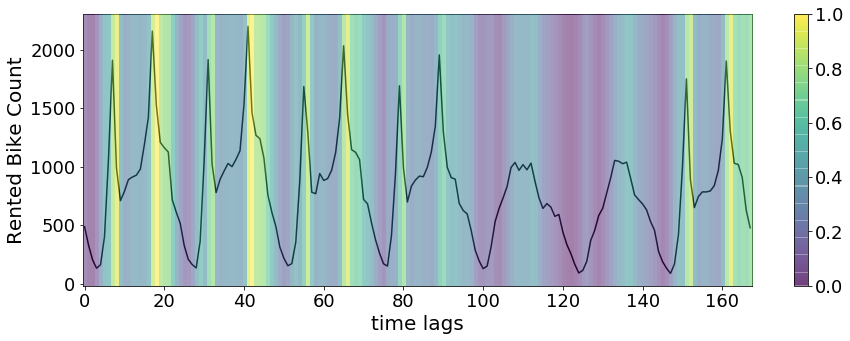

In [370]:
##res
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Rented Bike Count'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

In [574]:
import numpy as np
from tensorflow.keras.models import Model
import cv2

def ScoreCam(model, img_array, layer_name, max_N=-1):

    cls = np.argmax(model.predict(img_array))
    act_map_array = Model(inputs=model.input, outputs=model.get_layer(layer_name).output).predict(img_array)
    
    # extract effective maps
    if max_N != -1:
        act_map_std_list = [np.std(act_map_array[0,:,k]) for k in range(act_map_array.shape[3])]
        unsorted_max_indices = np.argpartition(-np.array(act_map_std_list), max_N)[:max_N]
        max_N_indices = unsorted_max_indices[np.argsort(-np.array(act_map_std_list)[unsorted_max_indices])]
        act_map_array = act_map_array[:,:,:,max_N_indices]

    input_shape = model.layers[0].output_shape[0][1:]  # get input shape
    # 1. upsample to original input size
    act_map_resized_list = [cv2.resize(act_map_array[0,:,k], input_shape[:2], interpolation=cv2.INTER_LINEAR) for k in range(act_map_array.shape[2])]
    # 2. normalize the raw activation value in each activation map into [0, 1]
    act_map_normalized_list = []
    for act_map_resized in act_map_resized_list:
        if np.max(act_map_resized) - np.min(act_map_resized) != 0:
            act_map_normalized = act_map_resized / (np.max(act_map_resized) - np.min(act_map_resized))
        else:
            act_map_normalized = act_map_resized
        act_map_normalized_list.append(act_map_normalized)
    # 3. project highlighted area in the activation map to original input space by multiplying the normalized activation map
    masked_input_list = []
    for act_map_normalized in act_map_normalized_list:
        masked_input = np.copy(img_array)
        for k in range(0):
            masked_input[0,:,k] *= act_map_normalized
        masked_input_list.append(masked_input)
    masked_input_array = np.concatenate(masked_input_list, axis=0)
    # 4. feed masked inputs into CNN model and softmax
    pred_from_masked_input_array = softmax(model.predict(masked_input_array))
    # 5. define weight as the score of target class
    weights = pred_from_masked_input_array[:,cls]
    # 6. get final class discriminative localization map as linear weighted combination of all activation maps
    cam = np.dot(act_map_array[0,:,:], weights)
    cam = np.maximum(0, cam)  # Passing through ReLU
    cam /= np.max(cam)  # scale 0 to 1.0
    
    return cam

def softmax(x):
    f = np.exp(x)/np.sum(np.exp(x), axis = 1, keepdims = True)
    return f

In [562]:
model = VGG16(include_top=True, weights='imagenet')
layer_name = 'block5_conv3'
img_array = read_and_preprocess_img('./image/hummingbird.jpg', size=(224,224))

score_cam = ScoreCam(model,img_array,layer_name)

plt.imshow(score_cam)
plt.show()

NameError: name 'VGG16' is not defined

In [580]:
img=testX[i]

img_tensor = np.expand_dims(img, axis=0)
print(img_tensor.shape)
#img_tensor=img_tensor.reshape(1,168,12,1)
scorecam = ScoreCam(model,img_tensor,'extractor')
print(scorecam)

plt.show()

(1, 168, 12)
0.14043394


In [552]:
img_tensor.shape

(1, 100, 200)

(1, 168, 64)


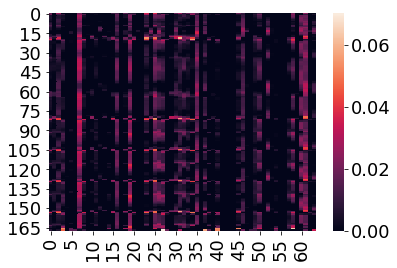

lstm_60/kernel:0 (9, 256)
[[-0. -0.  0. ...  0.  0.  0.]
 [ 0. -0. -0. ...  0.  0. -0.]
 [-0.  0. -0. ... -0. -0. -0.]
 ...
 [ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0.  0. -0.]
 [-0.  0. -0. ...  0. -0. -0.]]
lstm_60/recurrent_kernel:0 (64, 256)
[[-0. -0. -0. ...  0. -0. -0.]
 [ 0. -0. -0. ... -0. -0.  0.]
 [-0. -0. -0. ... -0. -0.  0.]
 ...
 [ 0.  0. -0. ...  0. -0. -0.]
 [ 0.  0.  0. ... -0.  0. -0.]
 [ 0.  0.  0. ...  0. -0. -0.]]
lstm_60/bias:0 (256,)
[-0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
 -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0.  0. -0. -0.  0. -0.  0.
 -0.  0. -0.  0. -0. -0. -0.  0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -0. -0. -0.

In [623]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = 10
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[7].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

In [607]:
model.layers[6]

### Timedistributed CNN-LSTM

### 단일 모델로 간다면 이거

In [582]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))

In [583]:

### cnn-LSTM

from tensorflow.keras.models import *

first_input = Input(shape=(None,168,12))

in1=TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu'))(first_input)
#in1= BatchNormalization(scale=False)(in1)
#in0=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)
in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
in1=LSTM(units =100 , return_sequences=True)(in1)
in1=LSTM(units=50)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))
#in1=Dropout(0.5)(in1)

out1=Dense(24, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/bike_cnnlstm_exp.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# fit model9
#history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

In [474]:
trainX.shape

(6816, 1, 168, 12)

In [584]:
model.summary()

Model: "model_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, None, 168, 12)]   0         
_________________________________________________________________
time_distributed_64 (TimeDis (None, None, 164, 64)     3904      
_________________________________________________________________
time_distributed_65 (TimeDis (None, None, 164, 64)     4160      
_________________________________________________________________
time_distributed_66 (TimeDis (None, None, 82, 64)      0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, None, 5248)        0         
_________________________________________________________________
lstm_66 (LSTM)               (None, None, 100)         2139600   
_________________________________________________________________
lstm_67 (LSTM)               (None, 50)                30

In [585]:
model.load_weights("saved_weights/bike_cnnlstm_exp.hdf5")

In [589]:
img=testX[i]

img_tensor = np.expand_dims(img, axis=0)
print(img_tensor.shape)
img_tensor=img_tensor.reshape(1,168,12,1)
scorecam = ScoreCam(model,img_tensor,'time_distributed_66')
print(scorecam)

plt.show()

(1, 1, 168, 12)


ValueError: Error when checking input: expected input_70 to have shape (None, 168, 12) but got array with shape (168, 12, 1)

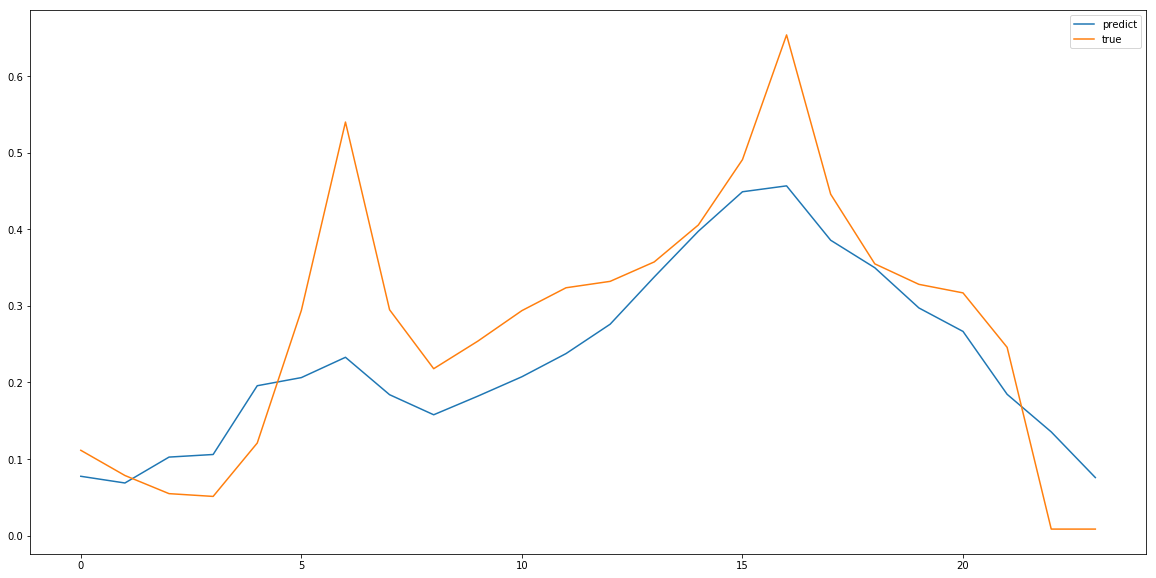

Test RMSE: 0.09698
Test MAE: 0.07315
Test MSE: 0.00941
Test RMSE: 347.83460
Test MAE: 262.34277


In [471]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[15]
testy=testY[15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


In [489]:
aug_rm=[]
aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.03310
Test RMSE: 0.05232
Test MAE: 0.03127
Test RMSE: 0.03778
Test MAE: 0.03671
Test RMSE: 0.05268
Test MAE: 0.10233
Test RMSE: 0.12960
Test MAE: 0.05417
Test RMSE: 0.08476
Test MAE: 0.03884
Test RMSE: 0.05470
Test MAE: 0.02902
Test RMSE: 0.03682
Test MAE: 0.07190
Test RMSE: 0.09806
Test MAE: 0.04611
Test RMSE: 0.05851
Test MAE: 0.04721
Test RMSE: 0.05774
Test MAE: 0.04338
Test RMSE: 0.05402
Test MAE: 0.06654
Test RMSE: 0.07931
Test MAE: 0.05260
Test RMSE: 0.07551
Test MAE: 0.08525
Test RMSE: 0.10152
Test MAE: 0.04886
Test RMSE: 0.06865
0.06946420561423541
0.052486945


### LSTM-CNN

In [187]:
from tensorflow.keras.models import Model

first_input = Input(shape=(168,8))

in1=LSTM(units =150 , return_sequences=True)(first_input)

#in1=TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in1)
in1=Conv1D(filters=64, kernel_size=5, activation='relu')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu')(in1)

#in1=add([in0,in1],name='extractor')
in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

in1=Flatten()(in1)
#model.add(LSTM(units = 128, return_sequences=True))
#in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))

out1=Dense(24, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/bike_lstmcnn_mulstep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [188]:
model.summary()

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 168, 8)]          0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 168, 150)          95400     
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 164, 64)           48064     
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 164, 64)           4160      
_________________________________________________________________
extractor (MaxPooling1D)     (None, 82, 64)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5248)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 24)                125

In [192]:
history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 6816 samples, validate on 684 samples
Epoch 1/100
6800/6816 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00001: val_loss improved from inf to 0.02844, saving model to saved_weights/bike_lstmcnn_mulstep.hdf5
6816/6816 [==============================] - 11s 2ms/sample - loss: 0.0191 - val_loss: 0.0284
Epoch 2/100
6800/6816 [============================>.] - ETA: 0s - loss: 0.0109
Epoch 00002: val_loss improved from 0.02844 to 0.02719, saving model to saved_weights/bike_lstmcnn_mulstep.hdf5
6816/6816 [==============================] - 10s 1ms/sample - loss: 0.0109 - val_loss: 0.0272
Epoch 3/100
6800/6816 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 00003: val_loss improved from 0.02719 to 0.02461, saving model to saved_weights/bike_lstmcnn_mulstep.hdf5
6816/6816 [==============================] - 10s 1ms/sample - loss: 0.0097 - val_loss: 0.0246
Epoch 4/100
6800/6816 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 00004: val_lo

KeyboardInterrupt: 

In [193]:
model.load_weights("saved_weights/bike_lstmcnn_mulstep.hdf5")

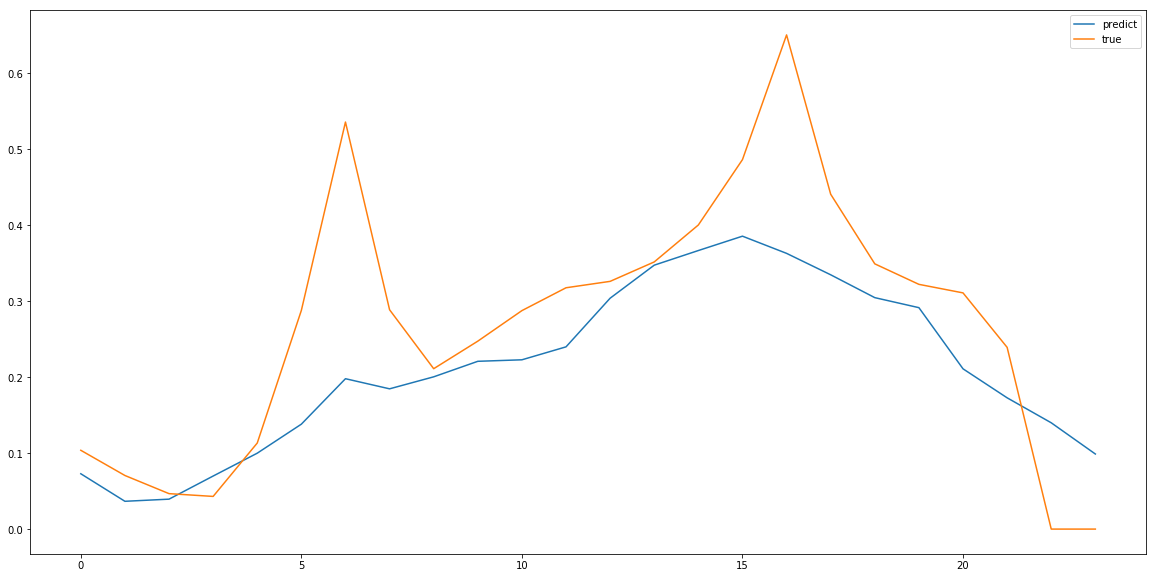

Test RMSE: 0.11441
Test MAE: 0.07996
Test MSE: 0.01309
Test RMSE: 410.33239
Test MAE: 286.79813


In [194]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[15]
testy=testY[15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

(1, 168, 64)


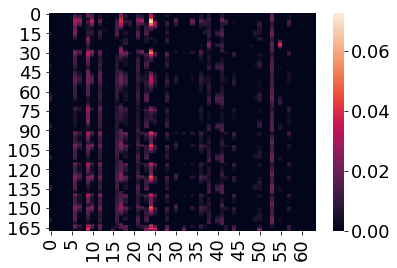

lstm_58/kernel:0 (9, 256)
[[-0. -0.  0. ... -0. -0.  0.]
 [-0. -0.  0. ...  0.  0. -0.]
 [-0.  0. -0. ... -0.  0. -0.]
 ...
 [ 0.  0.  0. ...  0. -0. -0.]
 [-0.  0.  0. ... -0. -0. -0.]
 [-0.  0.  0. ...  0. -0. -0.]]
lstm_58/recurrent_kernel:0 (64, 256)
[[-0. -0.  0. ...  0.  0. -0.]
 [ 0. -0. -0. ... -0.  0. -0.]
 [-0. -0.  0. ...  0. -0. -0.]
 ...
 [ 0.  0.  0. ...  0.  0. -0.]
 [-0. -0.  0. ...  0. -0.  0.]
 [-0. -0.  0. ... -0. -0.  0.]]
lstm_58/bias:0 (256,)
[-0. -0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0.
  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0.
 -0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0.
  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -0. -0.  0.

In [601]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = 0
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[4].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

In [14]:
cols

Index(['Rented Bike Count', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [544]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

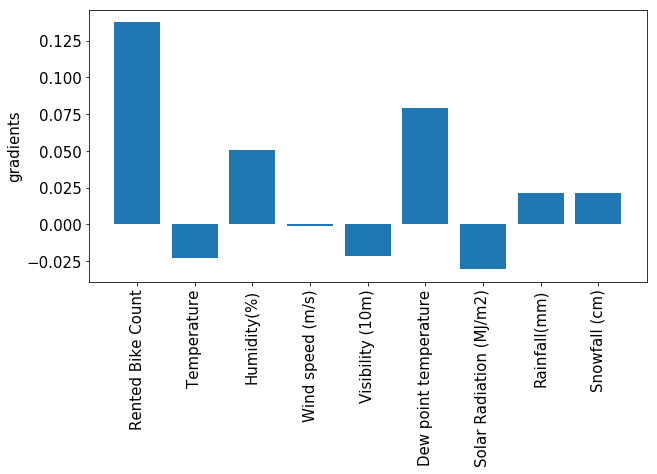

In [353]:

columns=cols
X_test=testX.copy()
id_=24*17
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [299]:
id_=24*17

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

#X_test[id_][:,0].shape

array([ 745.,  734.,  786.,  809.,  591.,  635.,  728.,  660.,  687.,
        664.,  665.,  528.,  429.,  316.,  158.,   92.,   79.,  129.,
        392.,  982., 1683.,  908.,  658.,  761.,  865.,  866.,  863.,
       1063., 1173., 1454., 2009., 1448., 1273., 1169., 1001.,  677.,
        561.,  461.,  302.,  176.,  104.,  133.,  375., 1045., 1896.,
        968.,  686.,  765.,  867.,  889.,  905.,  958., 1168., 1402.,
       2147., 1512., 1188., 1142., 1105.,  694.,  587.,  491.,  299.,
        181.,  135.,  106.,  335., 1025., 1902.,  997.,  755.,  869.,
        941., 1006.,  979., 1042., 1116., 1515., 2188., 1446., 1249.,
       1219., 1053.,  733.,  585.,  463.,  285.,  190.,  125.,  143.,
        329.,  860., 1670., 1281.,  758.,  746.,  920.,  860.,  876.,
        949., 1102., 1398., 2021., 1430., 1125., 1102., 1040.,  697.,
        658.,  494.,  349.,  234.,  142.,  122.,  385.,  916., 1676.,
        969.,  674.,  811.,  863.,  897.,  892.,  973., 1105., 1327.,
       1942., 1284.,

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


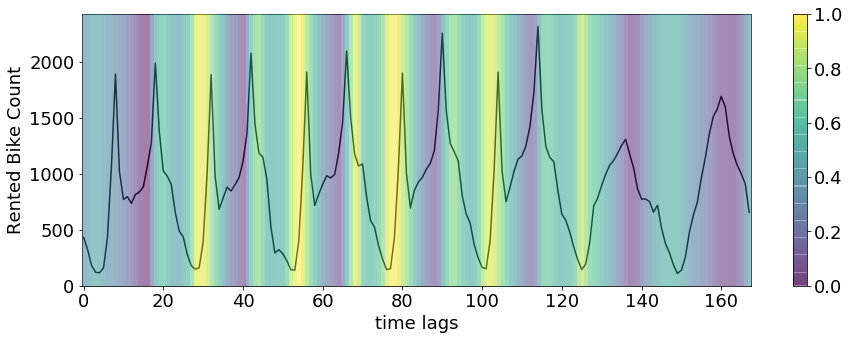

In [352]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Rented Bike Count'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

pyplot.show()


np.set_printoptions(False)

In [206]:
X_test.shape

(684, 168, 8)

SyntaxError: invalid syntax (visuals_gen.py, line 901)